In [1]:
import pandas as pd
import pprint
import warnings
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [2]:
product = pd.read_csv('Datos\Datos looks\product.csv')
brand = pd.read_csv('Datos\Datos looks//brand.csv')
color = pd.read_csv('Datos\Datos looks\color.csv')
feature_value_family = pd.read_csv('Datos\Datos looks//feature_value_family.csv')
feature_value= pd.read_csv('Datos\Datos looks//feature_value.csv')
feature= pd.read_csv('Datos\Datos looks//feature.csv')
product_feature_value_qualifier = pd.read_csv('Datos\Datos looks\product_feature_value_qualifier.csv')
product_feature_value = pd.read_csv('Datos\Datos looks\product_feature_value.csv')
product_variant = pd.read_csv('Datos\Datos looks\product_variant.csv')
season= pd.read_csv('Datos\Datos looks//season.csv')
size = pd.read_csv('Datos\Datos looks//size.csv')

In [3]:
tabla1 = pd.merge(product, brand, how='left', left_on='brand_id', right_on='id', suffixes=['','y'])
tabla1 = tabla1.drop(columns=['idy'])
tabla1.head(1)

,id,brand_id,family_id,"""group""",legacy_id,title,channels,name,origin,number
0,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0


In [ ]:
product_variant.head(1)

,id,barcode,color_id,legacy_id,product_id,season,size_id,stock,publishable
0,e652ced0-571b-4ebe-a349-47155e190141,1281248,6183657f-3a82-449d-aa6a-a14e96b0e9dd,317707,fa14ec83-b053-466e-afc0-ac164b77750f,9,0190622f-f028-42a8-b50e-ce310e8a9700,0,t


In [5]:
tabla2 = pd.merge(tabla1, product_variant, how='left', right_on='product_id', left_on='id', suffixes=['', '_variant'])
tabla2 = tabla2.drop(columns=['product_id'])
tabla2.head()

,id,brand_id,family_id,"""group""",legacy_id,title,channels,name,origin,number,id_variant,barcode,color_id,legacy_id_variant,season,size_id,stock,publishable
0,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,fbc2f719-e038-4243-892c-7bd2ca6e80b5,740661,6183657f-3a82-449d-aa6a-a14e96b0e9dd,\N,8,a1b735a2-d6e2-4bc8-8502-ccab18802622,0,t
1,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,1920105d-0671-412b-b09f-ef1c983f2be5,740647,6183657f-3a82-449d-aa6a-a14e96b0e9dd,\N,8,77df887d-f7da-42bd-9ebf-a5a2ca57974f,0,t
2,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,a3a0144e-7aa5-4572-b513-285059a14735,740630,6183657f-3a82-449d-aa6a-a14e96b0e9dd,\N,8,0190622f-f028-42a8-b50e-ce310e8a9700,0,t
3,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,c85666c0-a8ba-42f4-a30f-17687ad51ff5,740708,a4902902-49e1-4132-af75-982ab7afec9d,\N,8,cbbdcb38-00c1-4ec2-a76b-cdf948cc81ce,0,t
4,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,93db9797-3a66-4889-be9c-5d3522da96a1,740739,f570d998-7aa4-442d-8a2f-7885bd499729,\N,8,0190622f-f028-42a8-b50e-ce310e8a9700,0,t


In [6]:
tabla2.shape

(23935, 18)

In [7]:
tabla3 = pd.merge(tabla2, color, how='left', right_on='id', left_on='color_id', suffixes=['', '_color'])
tabla3 = tabla3.drop(columns=['id_color'])
tabla3.head()

,id,brand_id,family_id,"""group""",legacy_id,title,channels,name,origin,number,...,color_id,legacy_id_variant,season,size_id,stock,publishable,code,hexadecimal,name_color,parent
0,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,6183657f-3a82-449d-aa6a-a14e96b0e9dd,\N,8,a1b735a2-d6e2-4bc8-8502-ccab18802622,0,t,C2,000000,black,\N
1,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,6183657f-3a82-449d-aa6a-a14e96b0e9dd,\N,8,77df887d-f7da-42bd-9ebf-a5a2ca57974f,0,t,C2,000000,black,\N
2,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,6183657f-3a82-449d-aa6a-a14e96b0e9dd,\N,8,0190622f-f028-42a8-b50e-ce310e8a9700,0,t,C2,000000,black,\N
3,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,a4902902-49e1-4132-af75-982ab7afec9d,\N,8,cbbdcb38-00c1-4ec2-a76b-cdf948cc81ce,0,t,C15,DFC8B2,beige,\N
4,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,f570d998-7aa4-442d-8a2f-7885bd499729,\N,8,0190622f-f028-42a8-b50e-ce310e8a9700,0,t,C27,B94600,rust,e9f37c85-a5bd-4f52-a891-b575ab2f787f


In [8]:
size.head()

,id,europe,lookiero,uk,"""order""",visual_order
0,14508c05-75db-4e21-a298-bd2571b7cfff,"{""size"": ""UNQ"", ""format"": ""UNQ""}","{""size"": ""UNQ"", ""format"": ""UNQ""}","{""size"": ""UNQ"", ""format"": ""UNQ""}",0,0
1,2253af04-81e1-4a91-a834-9b99c5a641f2,"{""size"": ""32"", ""format"": ""32""}","{""size"": ""XXS"", ""format"": ""XXS""}","{""size"": ""4"", ""format"": ""4""}",5,1
2,1d2d6b5b-856d-43e4-895f-6627fe2585dd,"{""size"": ""4"", ""format"": ""32-28"", ""length"": ""28""}","{""size"": ""XXS"", ""format"": ""XXS-28"", ""length"": ...","{""size"": ""4"", ""format"": ""4-28"", ""length"": ""28""}",2,2
3,649a0747-6e83-4595-b8e7-87ecd2f064e9,"{""size"": ""4"", ""format"": ""32-30"", ""length"": ""30""}","{""size"": ""XXS"", ""format"": ""XXS-30"", ""length"": ...","{""size"": ""4"", ""format"": ""4-30"", ""length"": ""30""}",7,3
4,a2ba0306-31e0-436a-aaba-d4b8efd5ea59,"{""size"": ""4"", ""format"": ""32-32"", ""length"": ""32""}","{""size"": ""XXS"", ""format"": ""XXS-32"", ""length"": ...","{""size"": ""4"", ""format"": ""4-32"", ""length"": ""32""}",16,4


In [9]:
tabla4= pd.merge(tabla3, size, how='left', right_on='id', left_on='size_id', suffixes=['', '_drop'])
tabla4 = tabla4.drop(columns=['id_drop'])
tabla4.head()

,id,brand_id,family_id,"""group""",legacy_id,title,channels,name,origin,number,...,publishable,code,hexadecimal,name_color,parent,europe,lookiero,uk,"""order""",visual_order
0,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,t,C2,000000,black,\N,"{""size"": ""42"", ""format"": ""42""}","{""size"": ""XL"", ""format"": ""XL""}","{""size"": ""14"", ""format"": ""14""}",69,26
1,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,t,C2,000000,black,\N,"{""size"": ""38"", ""format"": ""38""}","{""size"": ""M"", ""format"": ""M""}","{""size"": ""10"", ""format"": ""10""}",38,16
2,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,t,C2,000000,black,\N,"{""size"": ""36"", ""format"": ""36""}","{""size"": ""S"", ""format"": ""S""}","{""size"": ""8"", ""format"": ""8""}",24,11
3,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,t,C15,DFC8B2,beige,\N,"{""size"": ""40"", ""format"": ""40""}","{""size"": ""L"", ""format"": ""L""}","{""size"": ""12"", ""format"": ""12""}",51,21
4,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,t,C27,B94600,rust,e9f37c85-a5bd-4f52-a891-b575ab2f787f,"{""size"": ""36"", ""format"": ""36""}","{""size"": ""S"", ""format"": ""S""}","{""size"": ""8"", ""format"": ""8""}",24,11


In [10]:
tabla5= pd.merge(tabla4, product_feature_value, how='left', right_on='product_id', left_on='id', suffixes=['', '_feature'])
tabla5 = tabla5.drop(columns=['product_id'])
tabla5.head()

,id,brand_id,family_id,"""group""",legacy_id,title,channels,name,origin,number,...,hexadecimal,name_color,parent,europe,lookiero,uk,"""order""",visual_order,id_feature,feature_value_id
0,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,000000,black,\N,"{""size"": ""42"", ""format"": ""42""}","{""size"": ""XL"", ""format"": ""XL""}","{""size"": ""14"", ""format"": ""14""}",69,26,17180364-12d1-423b-b9f4-ed7d121910d2,b5ce1fed-4c38-4920-90b5-42e46f971e97
1,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,000000,black,\N,"{""size"": ""42"", ""format"": ""42""}","{""size"": ""XL"", ""format"": ""XL""}","{""size"": ""14"", ""format"": ""14""}",69,26,f5ff2b4f-ae17-4f53-b18b-9d269471790a,cc2da427-ae37-4e83-8728-d9dc93539806
2,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,000000,black,\N,"{""size"": ""42"", ""format"": ""42""}","{""size"": ""XL"", ""format"": ""XL""}","{""size"": ""14"", ""format"": ""14""}",69,26,bf200d63-0e15-4ea8-a5c7-6c9b65369bc9,c42e949a-06dd-4888-b7be-b73e2c88b541
3,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,000000,black,\N,"{""size"": ""42"", ""format"": ""42""}","{""size"": ""XL"", ""format"": ""XL""}","{""size"": ""14"", ""format"": ""14""}",69,26,28a885d6-cc6e-4d12-8b9c-29a4dec5f402,e5badc68-5360-414e-beba-b10ed1a56629
4,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,000000,black,\N,"{""size"": ""42"", ""format"": ""42""}","{""size"": ""XL"", ""format"": ""XL""}","{""size"": ""14"", ""format"": ""14""}",69,26,beaee8ca-0ce2-4041-bc7e-3574f14c3d70,877425b0-3bed-4c99-97de-09a53c508058


In [11]:
tabla6= pd.merge(tabla5, feature_value, how='left', right_on='id', left_on='feature_value_id', suffixes=['', '_drop'])
tabla6 = tabla6.drop(columns=['id_drop'])
tabla6.head()

,id,brand_id,family_id,"""group""",legacy_id,title,channels,name,origin,number,...,parent,europe,lookiero,uk,"""order""",visual_order,id_feature,feature_value_id,value,feature_id
0,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,\N,"{""size"": ""42"", ""format"": ""42""}","{""size"": ""XL"", ""format"": ""XL""}","{""size"": ""14"", ""format"": ""14""}",69,26,17180364-12d1-423b-b9f4-ed7d121910d2,b5ce1fed-4c38-4920-90b5-42e46f971e97,cardigan,0ccb5374-db8c-4dbb-afae-6b2652af170d
1,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,\N,"{""size"": ""42"", ""format"": ""42""}","{""size"": ""XL"", ""format"": ""XL""}","{""size"": ""14"", ""format"": ""14""}",69,26,f5ff2b4f-ae17-4f53-b18b-9d269471790a,cc2da427-ae37-4e83-8728-d9dc93539806,ribbed,10e14a5d-39b6-4045-93cc-1574f68606ec
2,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,\N,"{""size"": ""42"", ""format"": ""42""}","{""size"": ""XL"", ""format"": ""XL""}","{""size"": ""14"", ""format"": ""14""}",69,26,bf200d63-0e15-4ea8-a5c7-6c9b65369bc9,c42e949a-06dd-4888-b7be-b73e2c88b541,two,604b76cd-27a8-45ef-8734-618639ff331a
3,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,\N,"{""size"": ""42"", ""format"": ""42""}","{""size"": ""XL"", ""format"": ""XL""}","{""size"": ""14"", ""format"": ""14""}",69,26,28a885d6-cc6e-4d12-8b9c-29a4dec5f402,e5badc68-5360-414e-beba-b10ed1a56629,without_closing,2e2a28f9-566d-419f-9081-cc9061324110
4,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,\N,"{""size"": ""42"", ""format"": ""42""}","{""size"": ""XL"", ""format"": ""XL""}","{""size"": ""14"", ""format"": ""14""}",69,26,beaee8ca-0ce2-4041-bc7e-3574f14c3d70,877425b0-3bed-4c99-97de-09a53c508058,cold_season,6e518bda-2083-41b9-89c0-6c52392261d3


In [12]:
feature.head()

,id,name,type,multiple,unit
0,07f5ed21-5669-4cb5-93d8-622557af52ef,hip_contour,NUMBER,f,CENTIMETERS
1,083021ee-4f31-4175-b071-9f4883c84a53,neck,STRING,f,\N
2,0ccb5374-db8c-4dbb-afae-6b2652af170d,top_type,STRING,f,\N
3,10e14a5d-39b6-4045-93cc-1574f68606ec,finishing,STRING,t,\N
4,144d677e-67cc-49b2-9be1-74af3ab02945,style,STRING,t,\N


In [13]:
df_final= pd.merge(tabla6, feature, how='left', left_on='feature_id', right_on='id', suffixes=['','_drop'])
df_final = df_final.drop(columns=['id_drop'])
df_final.head()

,id,brand_id,family_id,"""group""",legacy_id,title,channels,name,origin,number,...,"""order""",visual_order,id_feature,feature_value_id,value,feature_id,name_drop,type,multiple,unit
0,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,69,26,17180364-12d1-423b-b9f4-ed7d121910d2,b5ce1fed-4c38-4920-90b5-42e46f971e97,cardigan,0ccb5374-db8c-4dbb-afae-6b2652af170d,top_type,STRING,f,\N
1,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,69,26,f5ff2b4f-ae17-4f53-b18b-9d269471790a,cc2da427-ae37-4e83-8728-d9dc93539806,ribbed,10e14a5d-39b6-4045-93cc-1574f68606ec,finishing,STRING,t,\N
2,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,69,26,bf200d63-0e15-4ea8-a5c7-6c9b65369bc9,c42e949a-06dd-4888-b7be-b73e2c88b541,two,604b76cd-27a8-45ef-8734-618639ff331a,adventurous,STRING,t,\N
3,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,69,26,28a885d6-cc6e-4d12-8b9c-29a4dec5f402,e5badc68-5360-414e-beba-b10ed1a56629,without_closing,2e2a28f9-566d-419f-9081-cc9061324110,closing,STRING,t,\N
4,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,69,26,beaee8ca-0ce2-4041-bc7e-3574f14c3d70,877425b0-3bed-4c99-97de-09a53c508058,cold_season,6e518bda-2083-41b9-89c0-6c52392261d3,weather,STRING,t,\N


In [14]:
df_final['family_id'].nunique()

19

In [15]:
warnings.filterwarnings(action='ignore')

columnas_base = ['id_variant', 'id', 'title', 'season', 'hexadecimal', 'name','family_id'] #'lookiero'
columnas_caracteristicas = ['id_variant', 'name_drop', 'value']

# Extraer las filas únicas por 'id_variant'
df_base = df_final[columnas_base].drop_duplicates(subset=['id_variant'])

# Crear el diccionario de características
df_caracteristicas = (
    df_final[columnas_caracteristicas]
    .dropna(subset=['name_drop', 'value'])  # Eliminar filas sin características
    .groupby('id_variant')
    .apply(lambda group: {row['name_drop']: row['value'] for _, row in group.iterrows()})
    .reset_index(name='caracteristicas')
)

df_resultado = pd.merge(df_base, df_caracteristicas, on='id_variant', how='inner')

df_resultado.head()

,id_variant,id,title,season,hexadecimal,name,family_id,caracteristicas
0,fbc2f719-e038-4243-892c-7bd2ca6e80b5,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,000000,BRAND119,141f32d6-a5af-49bf-b019-fd28354977f1,"{'top_type': 'cardigan', 'finishing': 'ribbed'..."
1,1920105d-0671-412b-b09f-ef1c983f2be5,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,000000,BRAND119,141f32d6-a5af-49bf-b019-fd28354977f1,"{'top_type': 'cardigan', 'finishing': 'ribbed'..."
2,a3a0144e-7aa5-4572-b513-285059a14735,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,000000,BRAND119,141f32d6-a5af-49bf-b019-fd28354977f1,"{'top_type': 'cardigan', 'finishing': 'ribbed'..."
3,c85666c0-a8ba-42f4-a30f-17687ad51ff5,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,DFC8B2,BRAND119,141f32d6-a5af-49bf-b019-fd28354977f1,"{'top_type': 'cardigan', 'finishing': 'ribbed'..."
4,93db9797-3a66-4889-be9c-5d3522da96a1,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,B94600,BRAND119,141f32d6-a5af-49bf-b019-fd28354977f1,"{'top_type': 'cardigan', 'finishing': 'ribbed'..."


In [16]:
df_resultado.shape

(23552, 8)

Junto color y id variante y elimino duplicados, y asi tengo valores únicos 

In [17]:
df_resultado['id_hex'] = df_resultado['id'] + "_" + df_resultado['hexadecimal']

df_resultado2 = df_resultado.drop_duplicates(subset='id_hex')

# Mostrar el resultado
df_resultado2.head()

,id_variant,id,title,season,hexadecimal,name,family_id,caracteristicas,id_hex
0,fbc2f719-e038-4243-892c-7bd2ca6e80b5,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,000000,BRAND119,141f32d6-a5af-49bf-b019-fd28354977f1,"{'top_type': 'cardigan', 'finishing': 'ribbed'...",5f5c4a50-557a-4d53-9e81-cc72fdd18fbf_000000
3,c85666c0-a8ba-42f4-a30f-17687ad51ff5,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,DFC8B2,BRAND119,141f32d6-a5af-49bf-b019-fd28354977f1,"{'top_type': 'cardigan', 'finishing': 'ribbed'...",5f5c4a50-557a-4d53-9e81-cc72fdd18fbf_DFC8B2
4,93db9797-3a66-4889-be9c-5d3522da96a1,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,B94600,BRAND119,141f32d6-a5af-49bf-b019-fd28354977f1,"{'top_type': 'cardigan', 'finishing': 'ribbed'...",5f5c4a50-557a-4d53-9e81-cc72fdd18fbf_B94600
15,0c1010aa-2f25-4c55-9f95-b9bc133f3307,6e6b4255-006a-4d13-b312-3b1426290d8e,Poly Pant deeluxe,7,B11730,BRAND117,6598b655-3e19-448c-8b4f-ff6a29447b34,"{'down_part_type': 'cigarette', 'adventurous':...",6e6b4255-006a-4d13-b312-3b1426290d8e_B11730
20,215a323c-9721-4879-9aa6-5cf30b5b21f0,6549c1b1-989e-432a-bdc9-b603c438b310,Onleden Sweater knt,9,FFFF00,BRAND119,1b93b30c-833f-45a8-ba69-c21d2e7f4824,"{'top_type': 'sweaters', 'adventurous': 'two',...",6549c1b1-989e-432a-bdc9-b603c438b310_FFFF00


In [18]:
df_resultado2.shape

(5357, 9)

___
### **Análisis exploratorio**
___

In [19]:
# Información general del DataFrame
print(df_resultado2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5357 entries, 0 to 23548
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_variant       5357 non-null   object
 1   id               5357 non-null   object
 2   title            5357 non-null   object
 3   season           5357 non-null   int64 
 4   hexadecimal      5357 non-null   object
 5   name             5357 non-null   object
 6   family_id        5357 non-null   object
 7   caracteristicas  5357 non-null   object
 8   id_hex           5357 non-null   object
dtypes: int64(1), object(8)
memory usage: 418.5+ KB
None


In [20]:
print(df_resultado2.describe(include='object'))

                                  id_variant  \
count                                   5357   
unique                                  5357   
top     a337b8f6-b327-450f-8fb1-54e58f04cc67   
freq                                       1   

                                          id               title hexadecimal  \
count                                   5357                5357        5357   
unique                                  2928                2905          53   
top     2f23f30a-31ce-4ffd-aa29-1fe80a1dd2d7  Dou Jeans onesize       000000   
freq                                      20                  20         996   

           name                             family_id  \
count      5357                                  5357   
unique      163                                    19   
top     BRAND55  1b93b30c-833f-45a8-ba69-c21d2e7f4824   
freq        264                                   583   

                                          caracteristicas  \
count      

In [21]:
# Valores nulos y porcentaje
missing_data = df_resultado2.isnull().sum()
missing_percent = (missing_data / len(df_resultado2)) * 100
print("\nValores nulos por columna:")
print(pd.DataFrame({'Nulos': missing_data, '% del total': missing_percent}))



Valores nulos por columna:
                 Nulos  % del total
id_variant           0          0.0
id                   0          0.0
title                0          0.0
season               0          0.0
hexadecimal          0          0.0
name                 0          0.0
family_id            0          0.0
caracteristicas      0          0.0
id_hex               0          0.0


In [22]:
# Análisis de 'season'
print("\nDistribución de 'season':")
print(df_resultado2['season'].value_counts())

# Análisis de 'name_color'
print("\nColores más frecuentes:")
print(df_resultado2['hexadecimal'].value_counts().head(10))




Distribución de 'season':
season
7    1923
8    1817
9    1617
Name: count, dtype: int64

Colores más frecuentes:
hexadecimal
000000    996
00008b    825
FFFFFF    262
666633    242
ECE9D6    227
B94600    199
164A0A    195
DEB24C    192
DFC8B2    180
FFC0CB    169
Name: count, dtype: int64


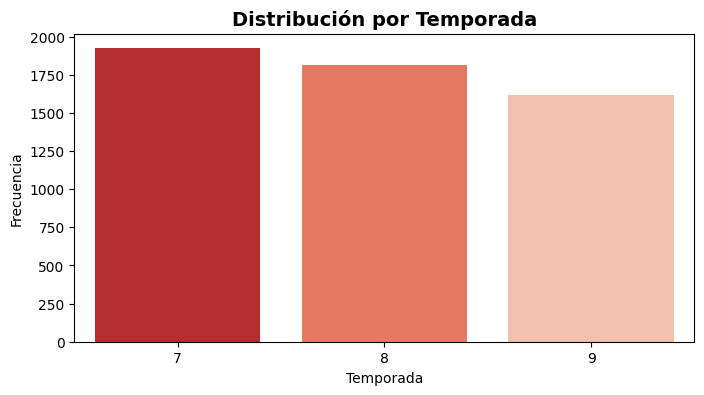

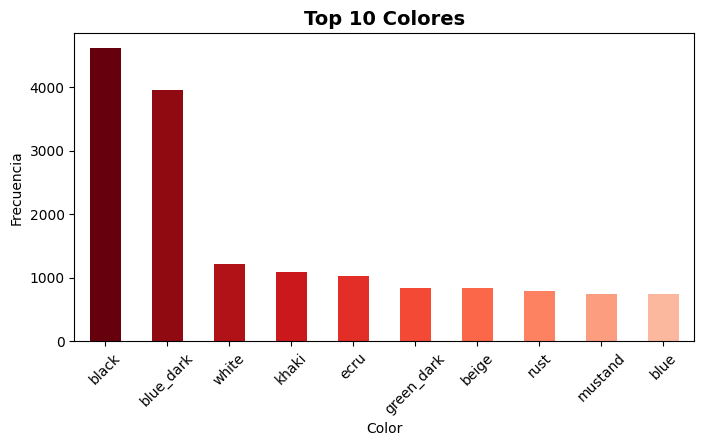

In [44]:
import os


# Crear carpeta 'graficos' si no existe
output_folder = 'graficos'
os.makedirs(output_folder, exist_ok=True)

# Visualización de 'season'
plt.figure(figsize=(8, 4))
sns.countplot(data=df_resultado2, x='season', palette='Reds_r')
plt.title('Distribución por Temporada', fontsize=14, weight='bold')
plt.xlabel('Temporada')
plt.ylabel('Frecuencia')
plt.savefig(os.path.join(output_folder, 'distribucion_temporada.png'))
plt.show()

# Visualización de colores ('name_color')
color_names_dict = dict(zip(df_final['hexadecimal'], df_final['name_color']))
top_colors = df_resultado['hexadecimal'].value_counts().head(10)
color_map = plt.cm.Reds(range(255, 50, -int(255/12)))
plt.figure(figsize=(8, 4))
ax = top_colors.plot(kind='bar', color=color_map)
ax.set_xticklabels([color_names_dict.get(color, color) for color in top_colors.index], fontsize=10, rotation=45)
plt.title('Top 10 Colores', fontsize=14, weight='bold')
plt.xlabel('Color')
plt.ylabel('Frecuencia')
plt.savefig(os.path.join(output_folder, 'top_10_colores.png'))
plt.show()



In [24]:
# Contar los valores únicos de 'weather'
weather_unique = df_resultado2['caracteristicas'].apply(lambda x: x['weather']).unique()

# Contar los valores únicos de 'season'
season_unique = df_resultado2['season'].unique()

# Mostrar los resultados
print("Valores únicos de 'weather':", weather_unique)
print("Valores únicos de 'season':", season_unique)

# Comparar si son iguales
if set(weather_unique) == set(season_unique):
    print("Los valores únicos de 'weather' y 'season' son los mismos.")
else:
    print("Los valores únicos de 'weather' y 'season' no son los mismos.")


Valores únicos de 'weather': ['cold_season' 'warm_season' 'warm' 'cold']
Valores únicos de 'season': [8 7 9]
Los valores únicos de 'weather' y 'season' no son los mismos.


In [25]:
# Normalizar los valores en la columna 'weather' dentro de 'caracteristicas'
df_resultado2['caracteristicas'] = df_resultado2['caracteristicas'].apply(
    lambda x: {**x, 'weather': 'cold' if x['weather'] == 'cold_season' 
                          else 'warm' if x['weather'] == 'warm_season' 
                          else x['weather']}
)

# Extraer nuevamente la columna 'weather' para verificar el cambio
df_resultado2['weather'] = df_resultado2['caracteristicas'].apply(lambda x: x['weather'])

# Verificar los valores únicos después de la transformación
print("Valores únicos actualizados de 'weather':", df_resultado2['weather'].unique())


Valores únicos actualizados de 'weather': ['cold' 'warm']


- Análisis características

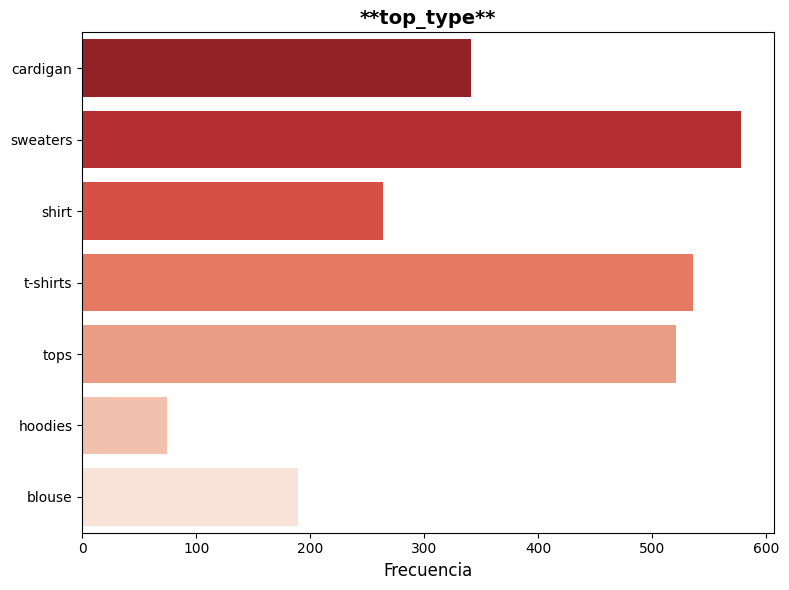

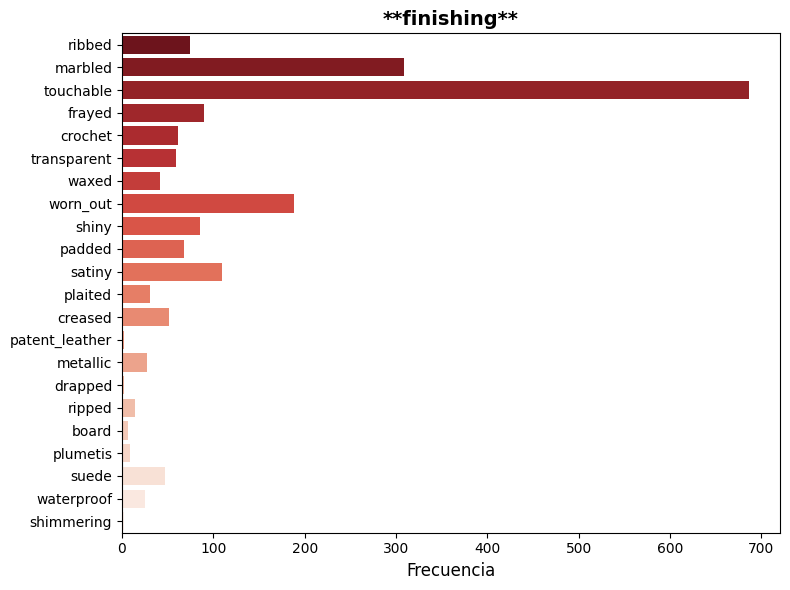

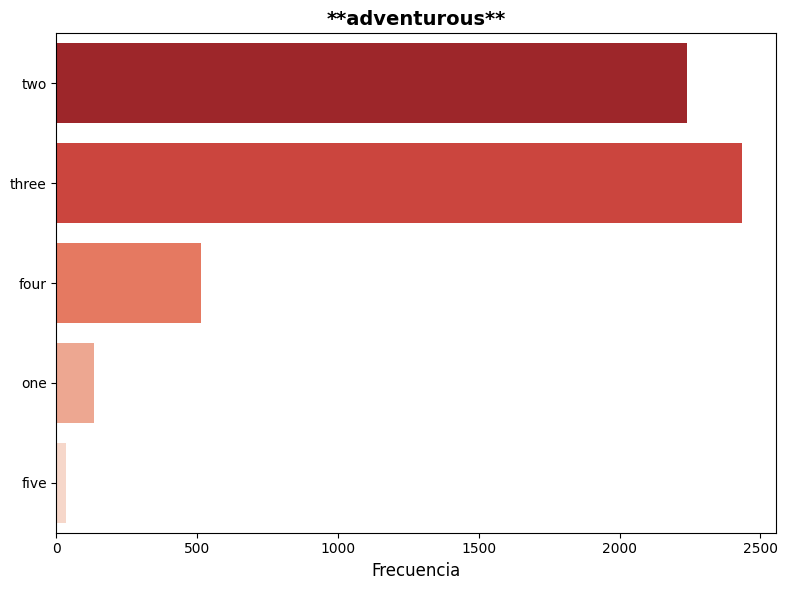

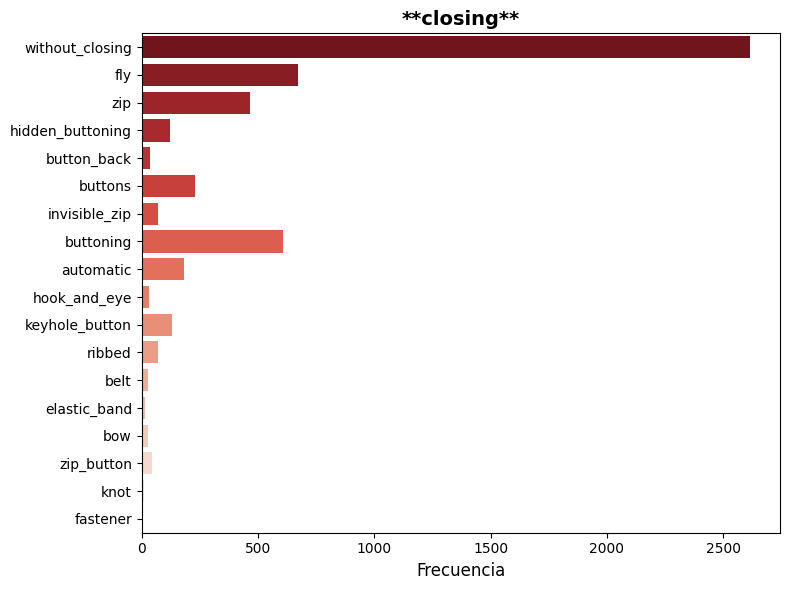

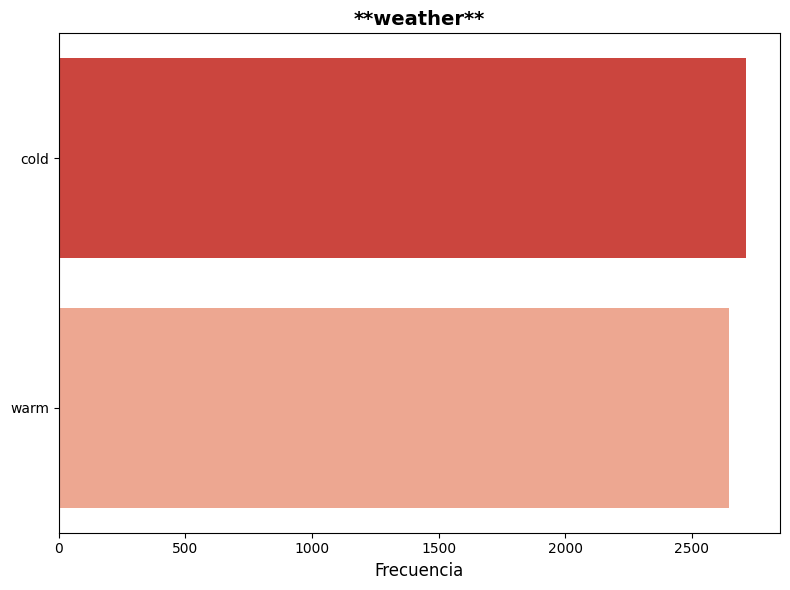

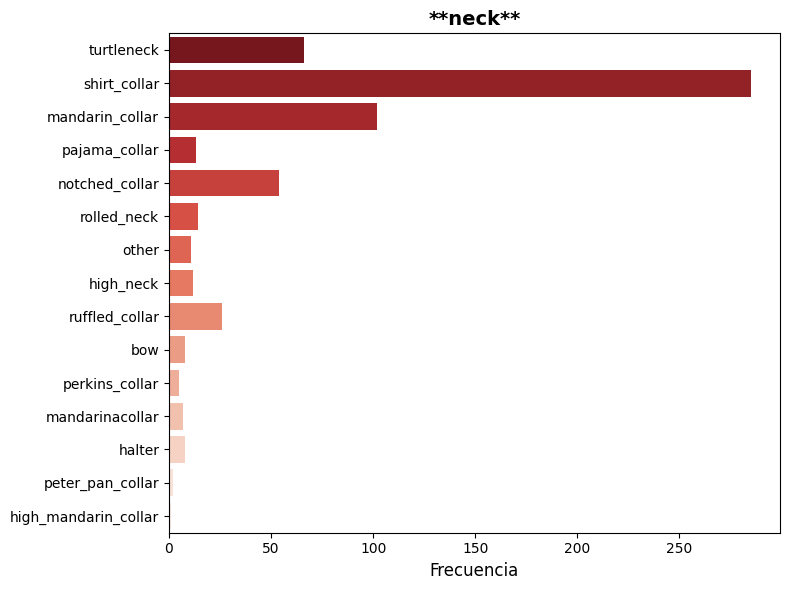

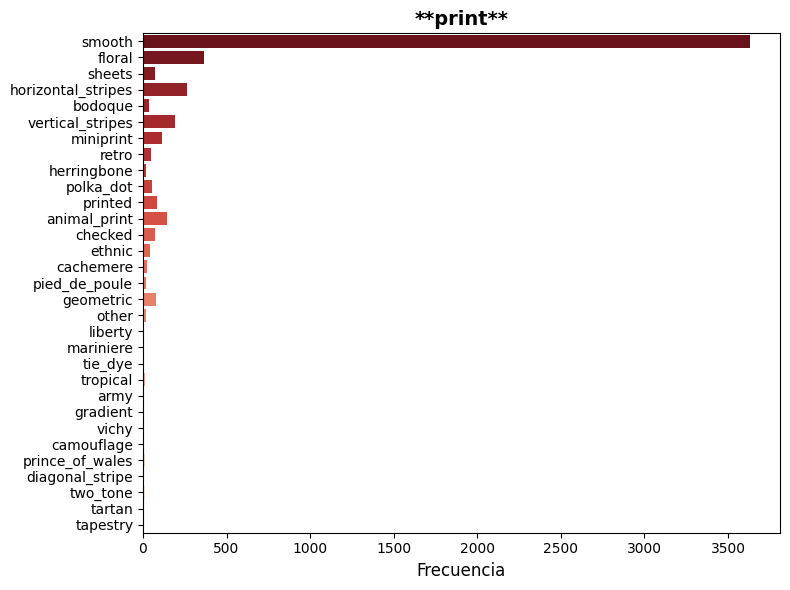

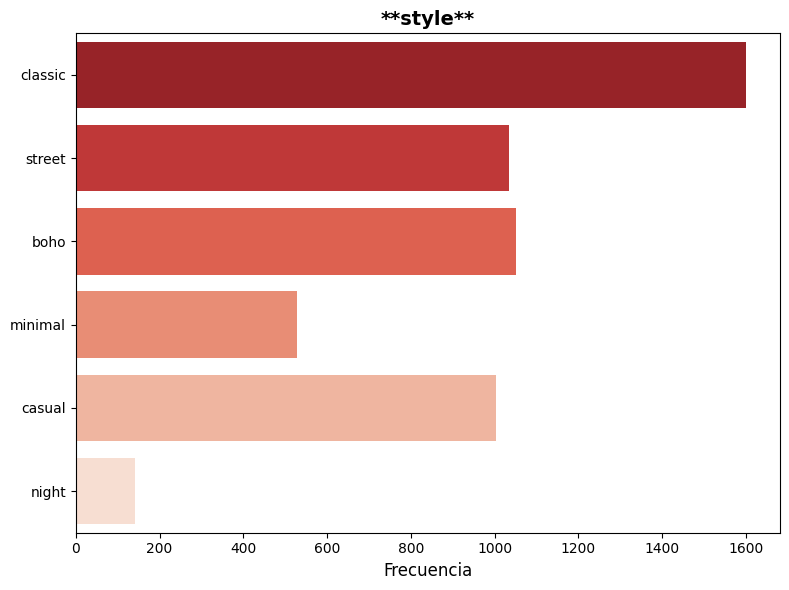

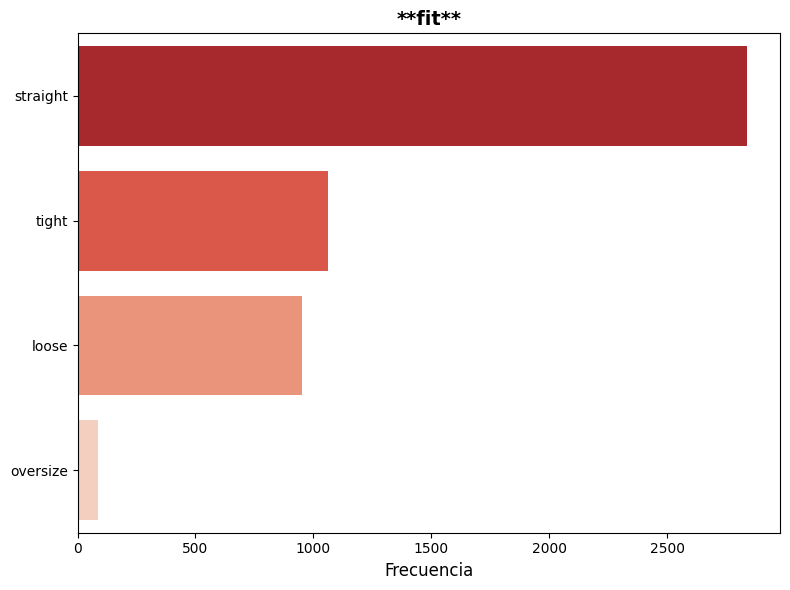

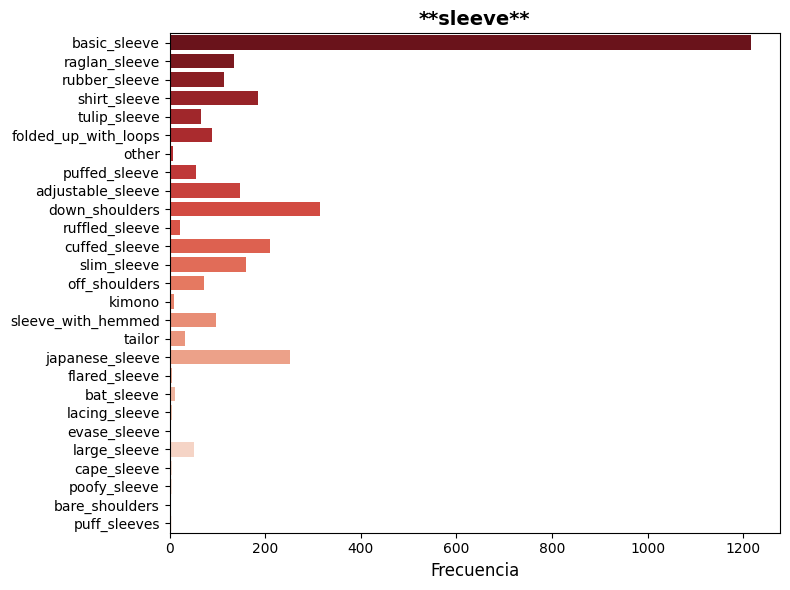

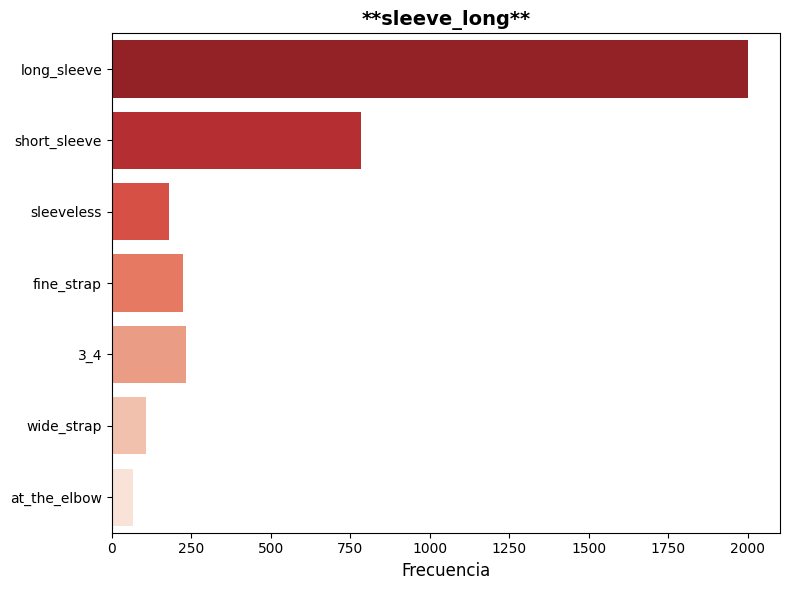

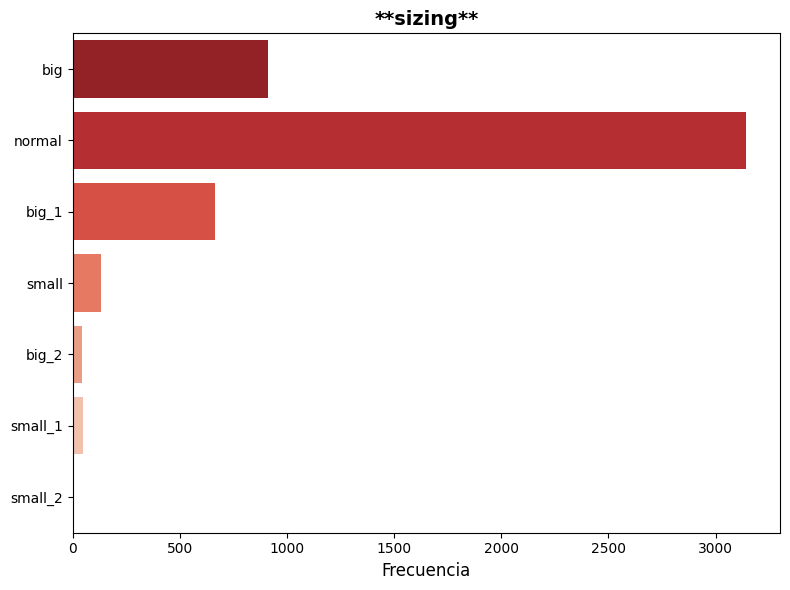

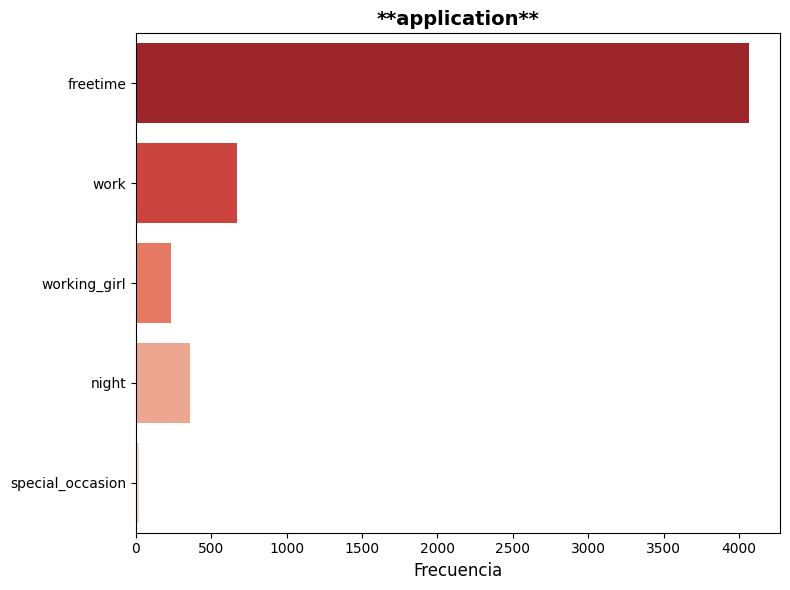

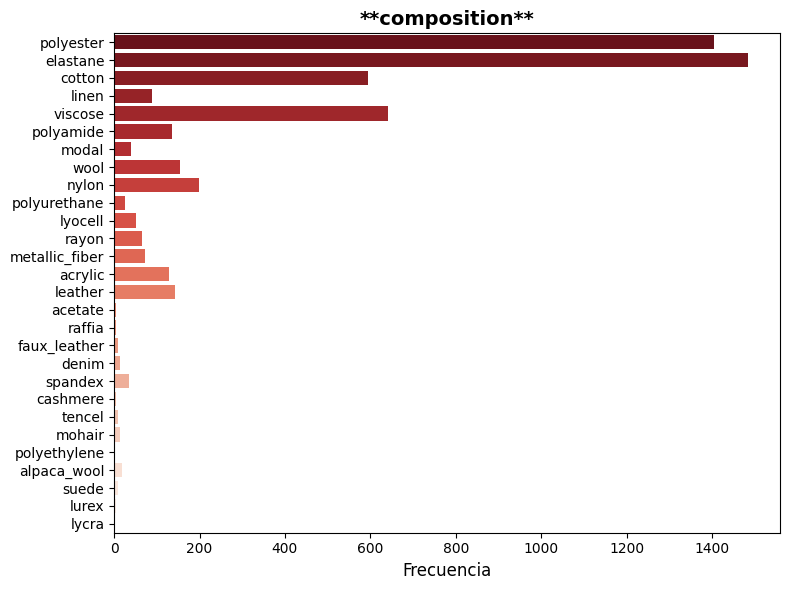

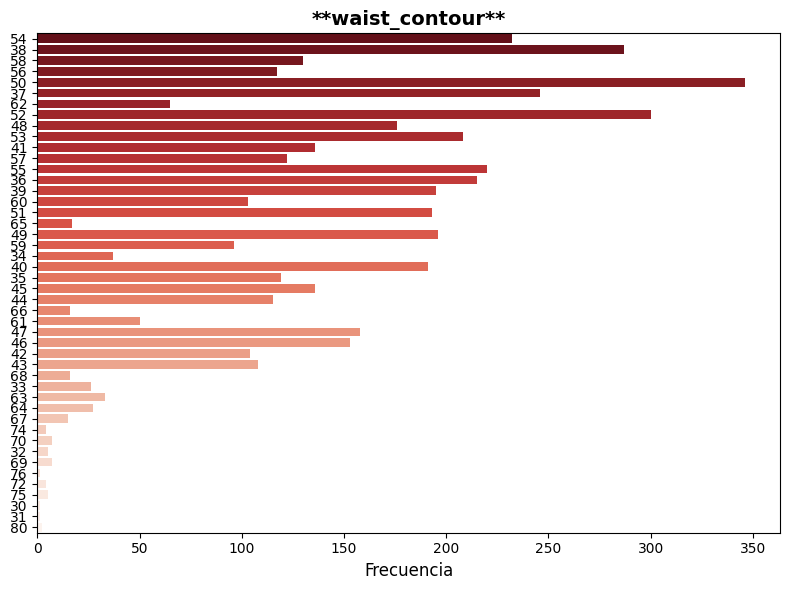

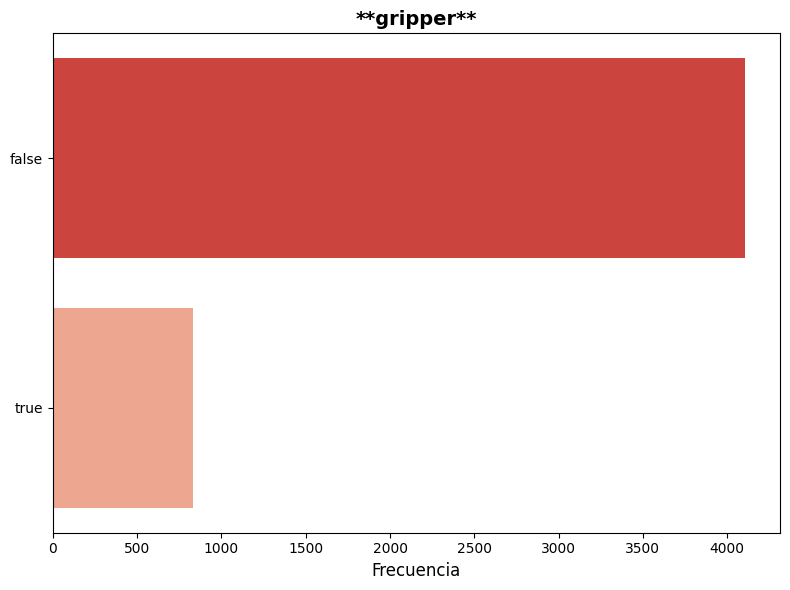

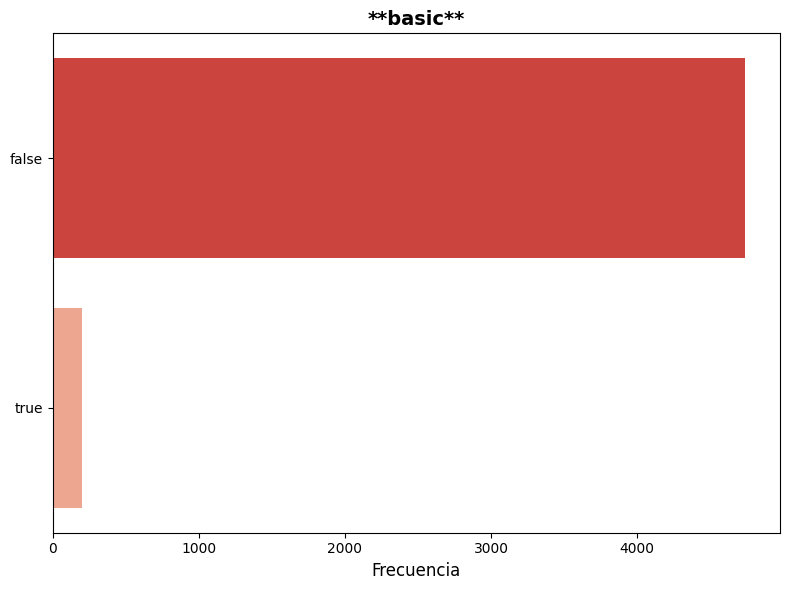

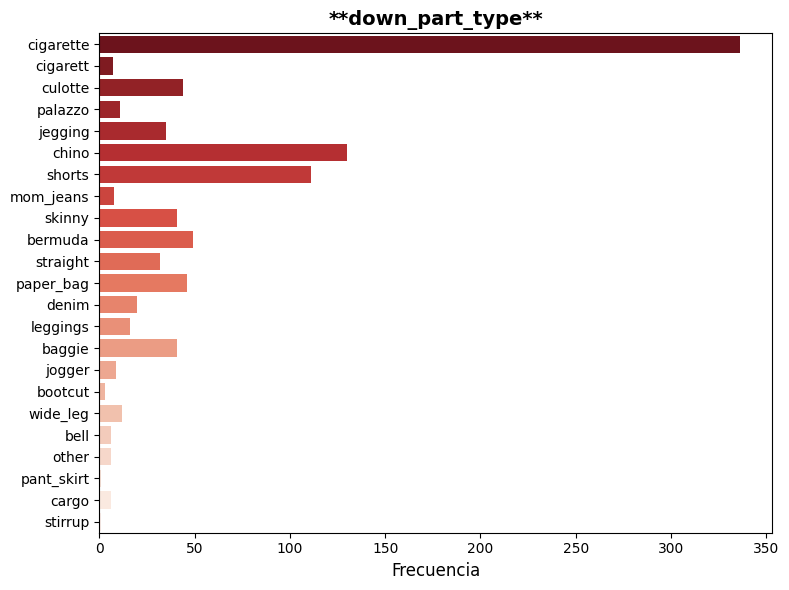

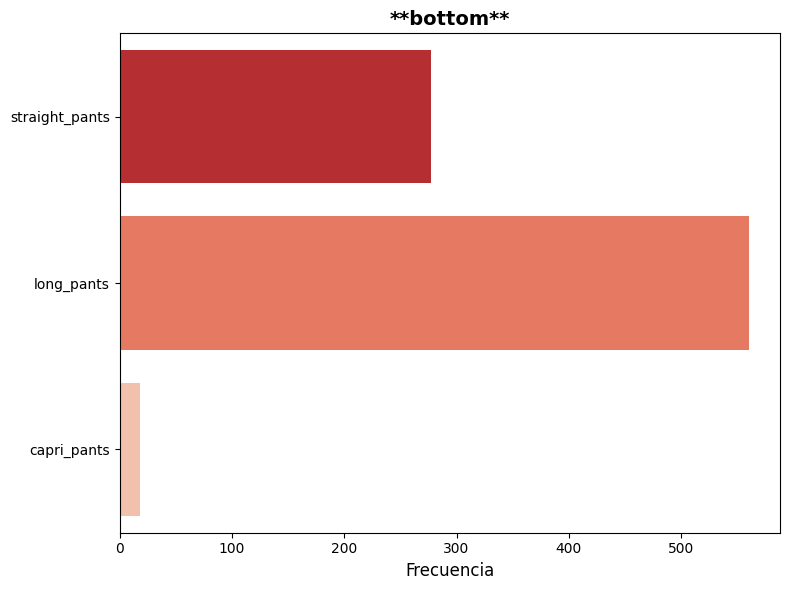

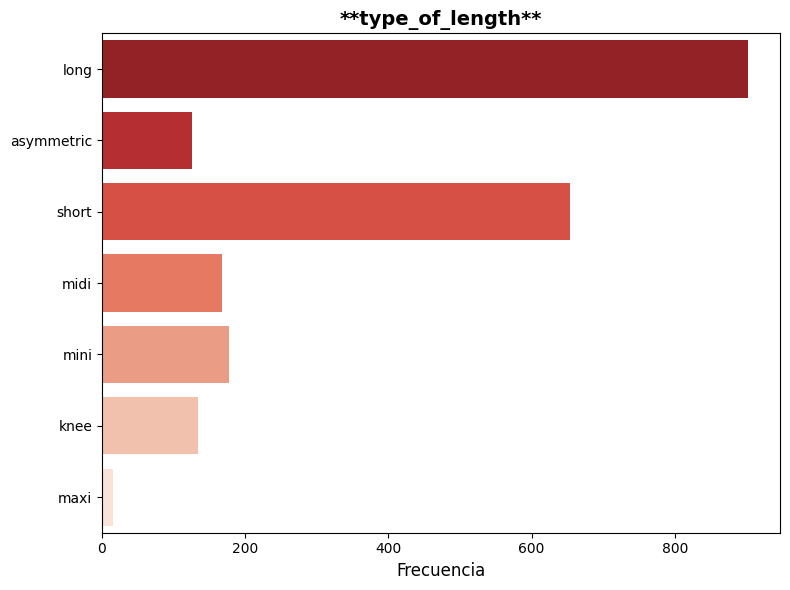

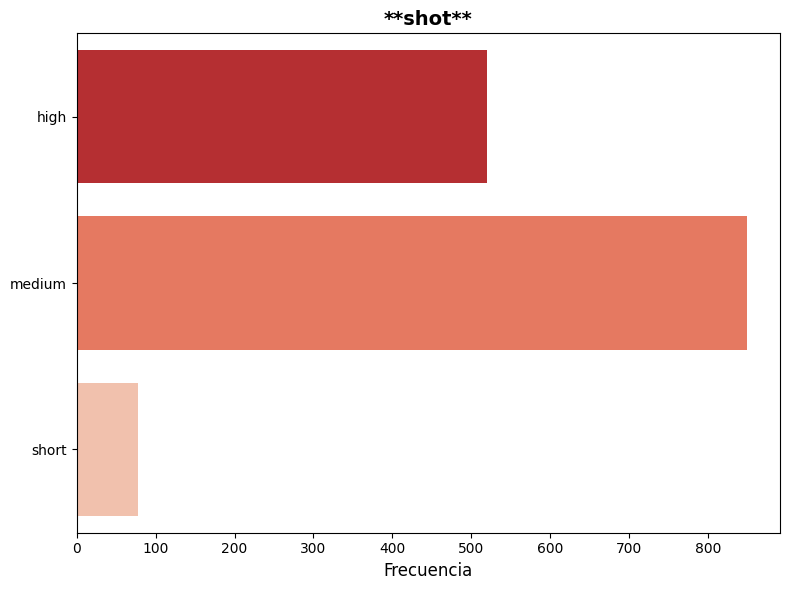

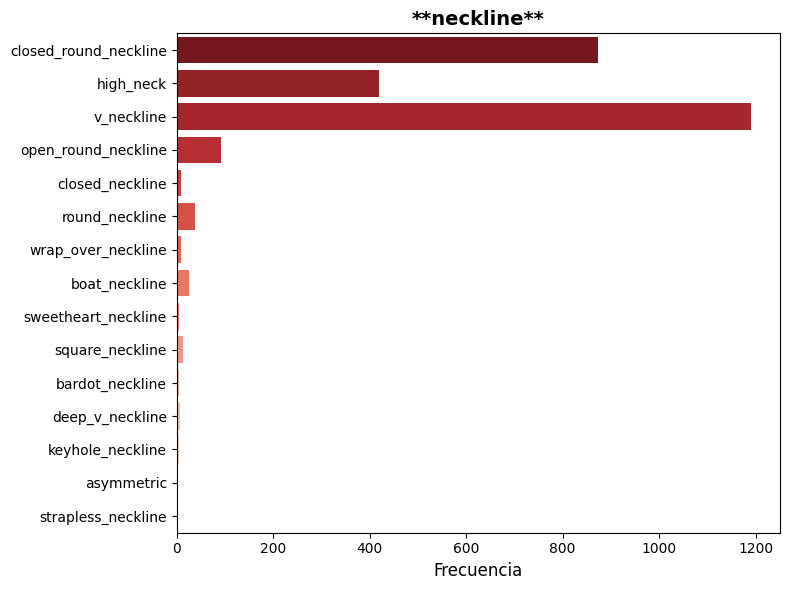

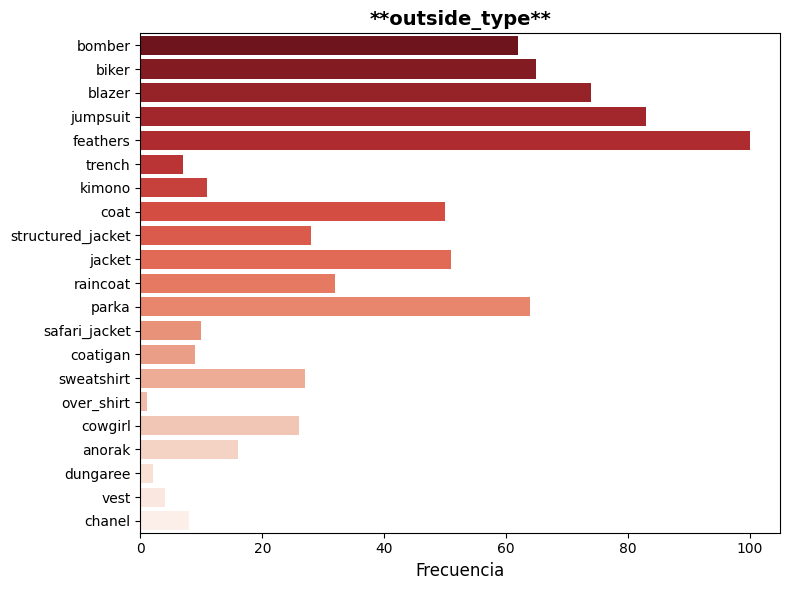

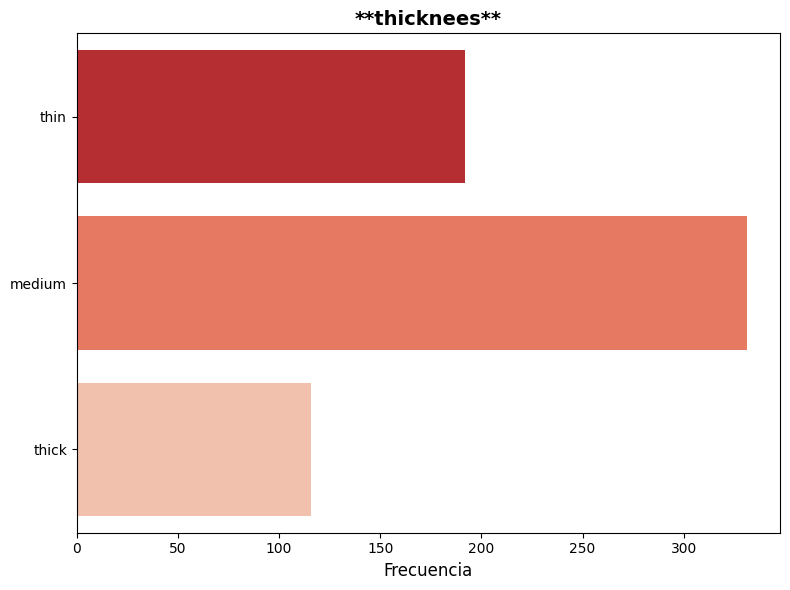

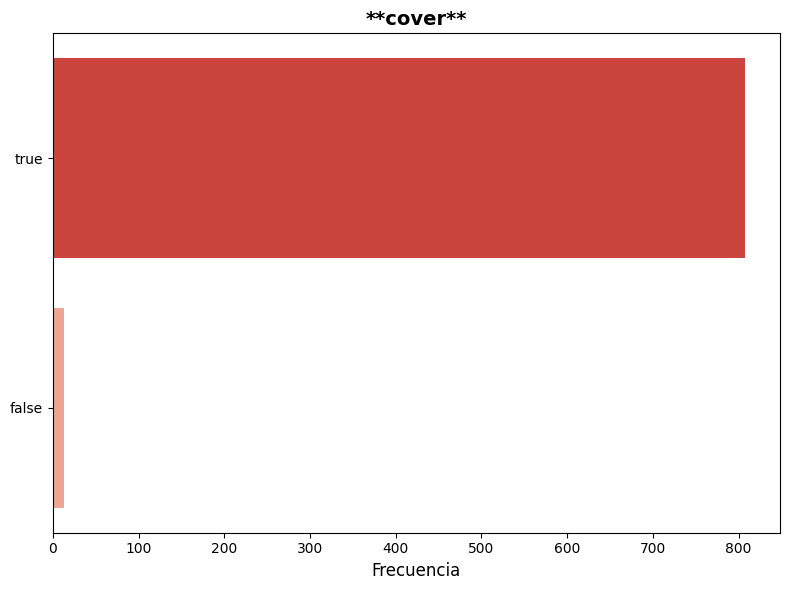

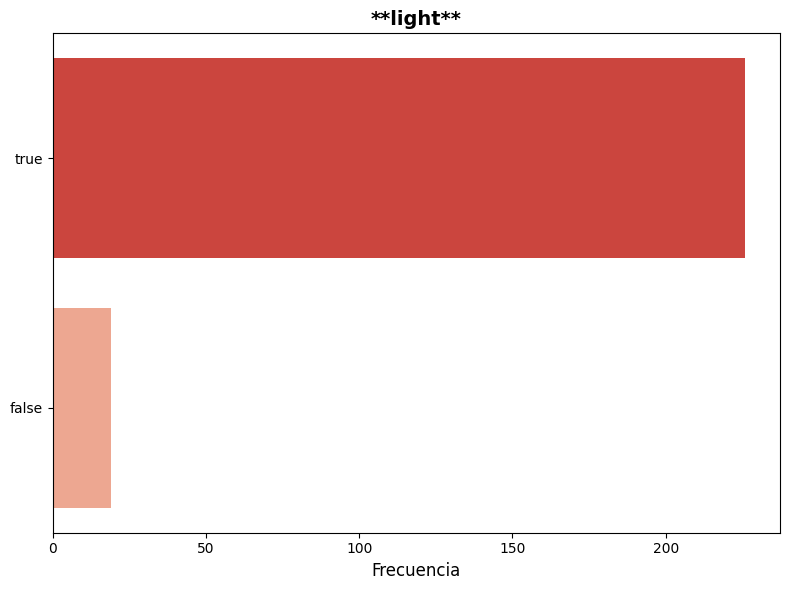

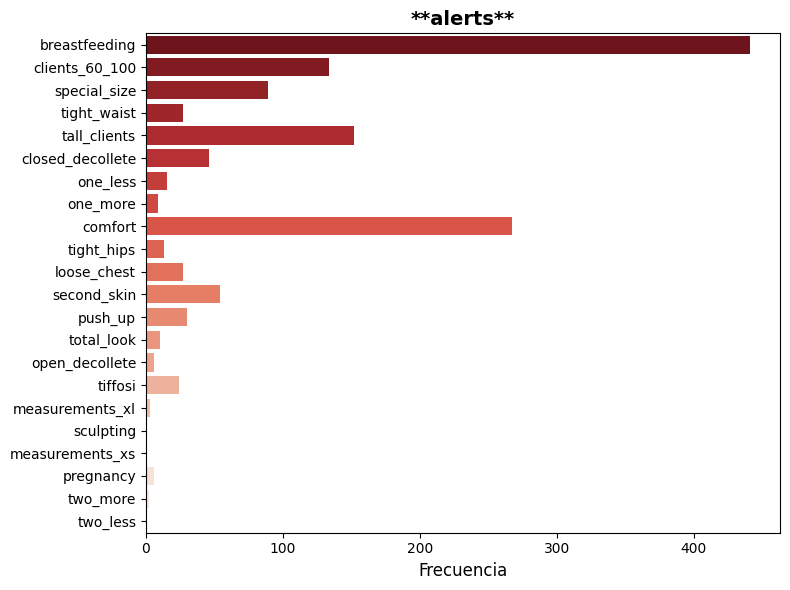

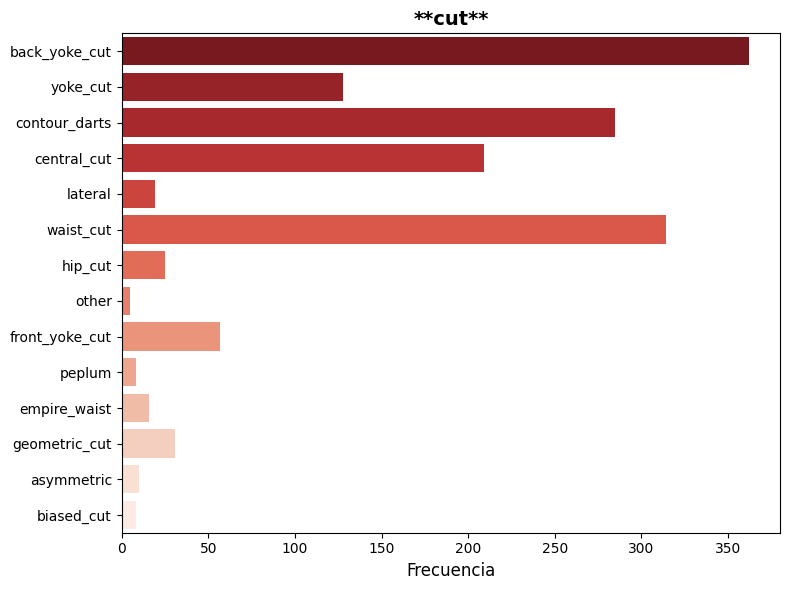

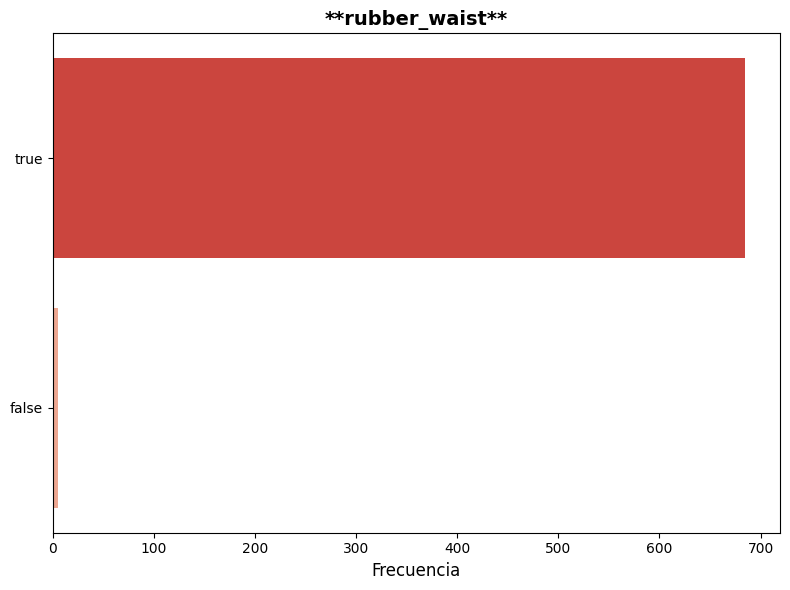

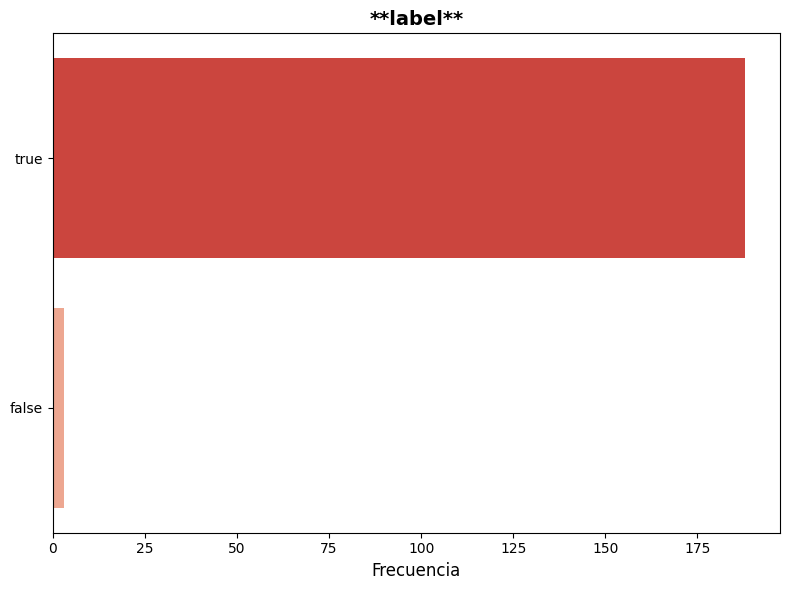

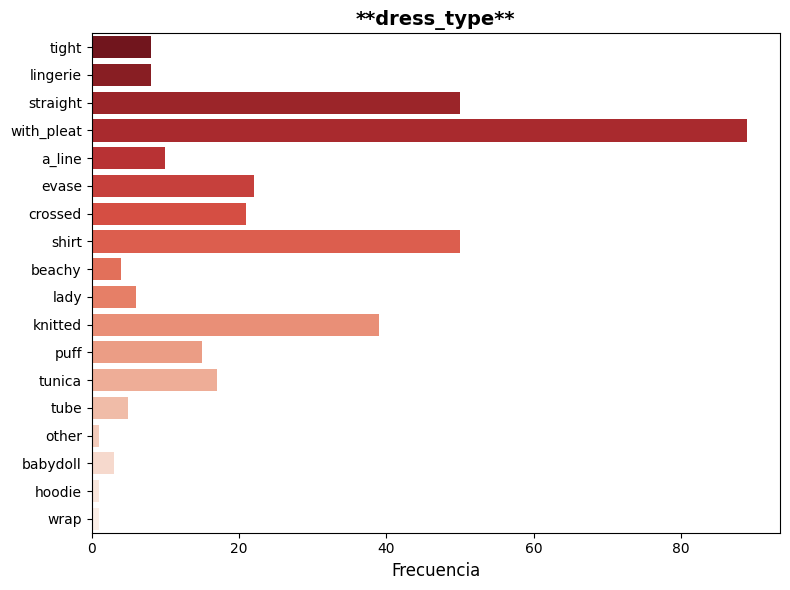

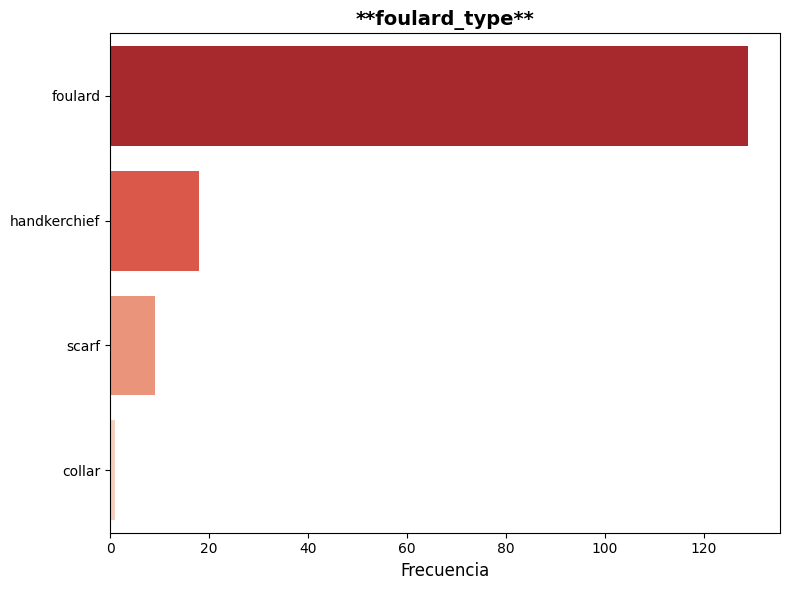

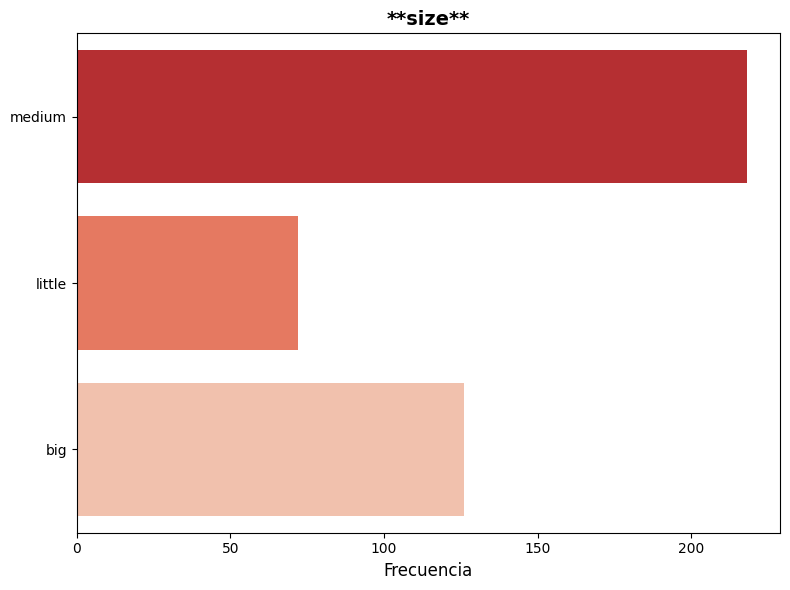

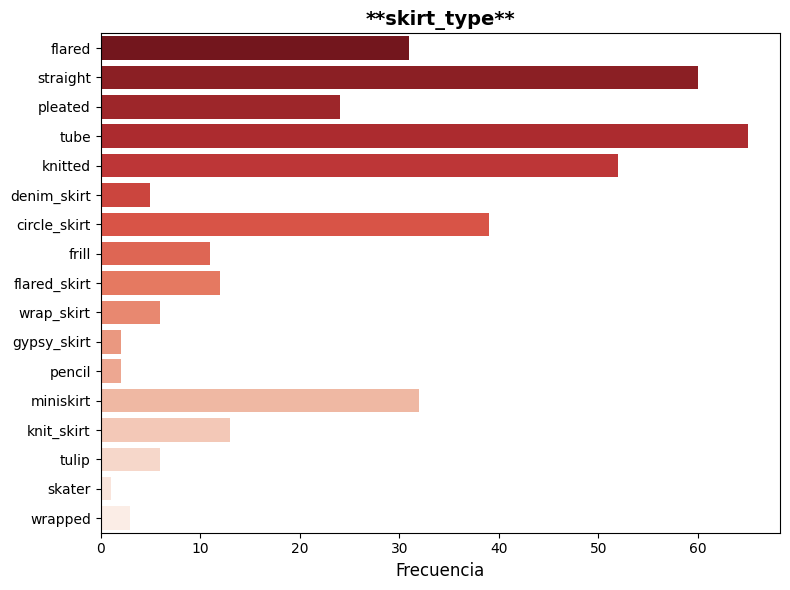

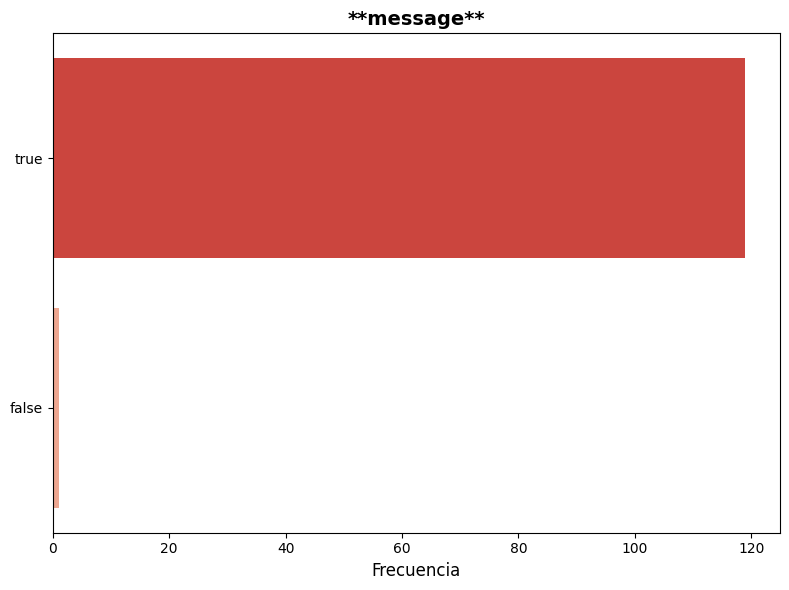

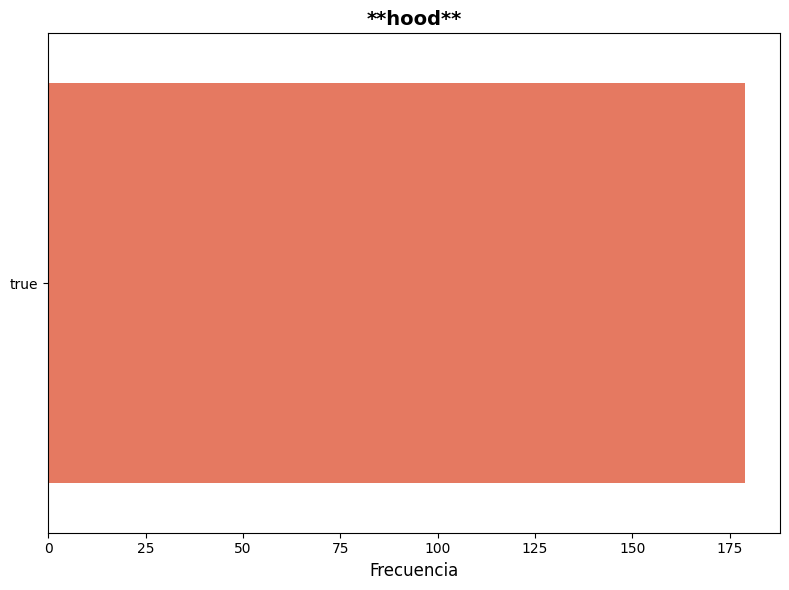

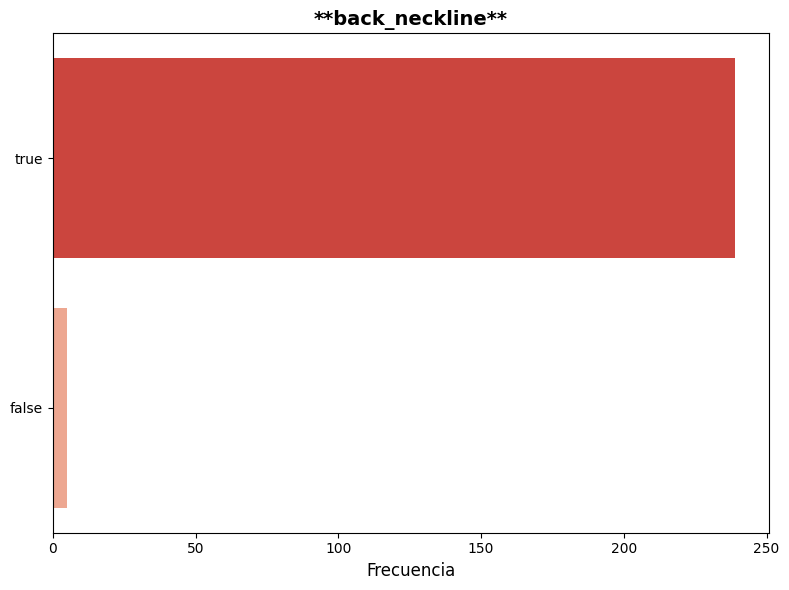

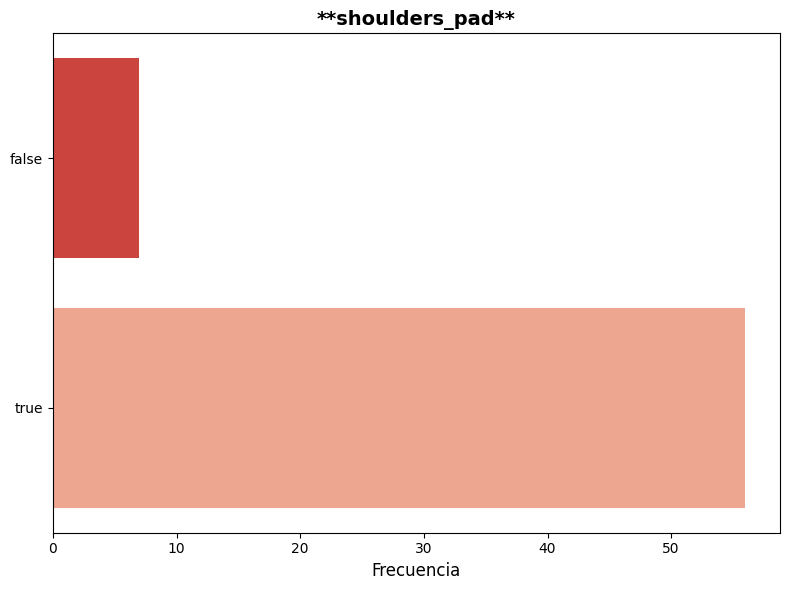

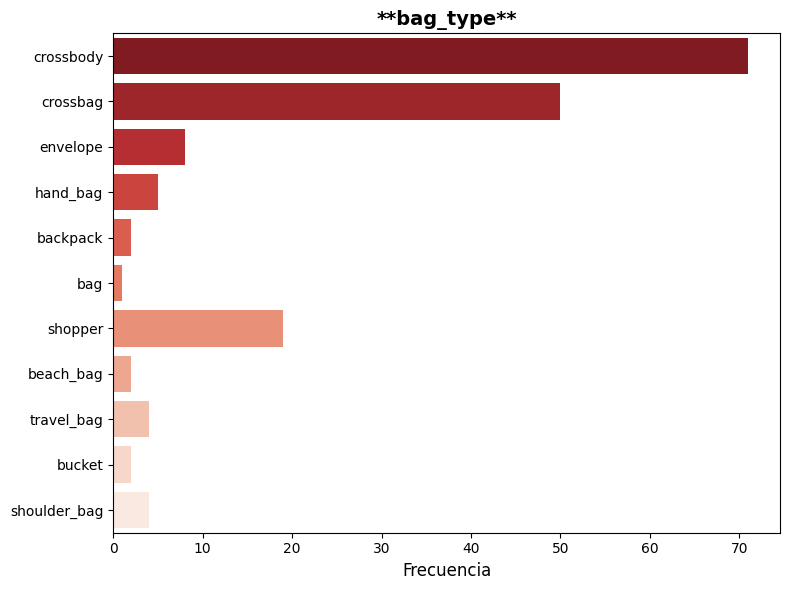

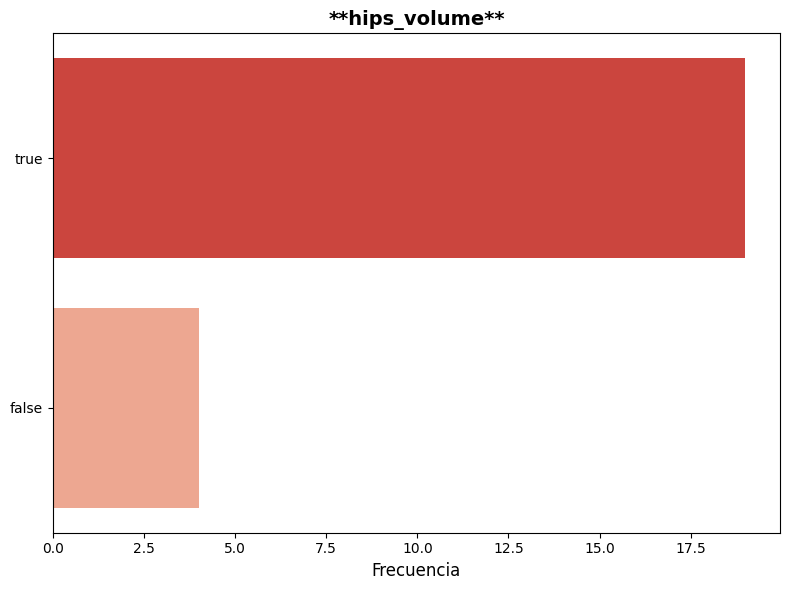

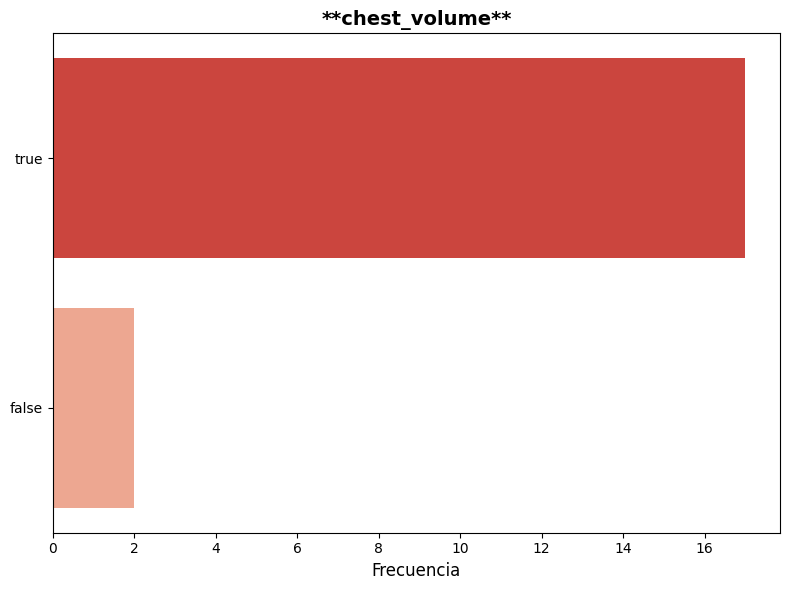

In [26]:
import os

expanded_data = []

for idx, row in df_resultado2.iterrows():
    if isinstance(row['caracteristicas'], dict):  # Asegurarse de que sea un diccionario
        for key, value in row['caracteristicas'].items():
            expanded_data.append({'key': key, 'value': value})

# Convertir a DataFrame
expanded_df = pd.DataFrame(expanded_data)

# Filtrar las claves a excluir
exclude_keys = ['detail', 'fabric', 'hip_contour', 'wait_contour', 'chest_contour', 'sleeve_long_cm', 'long_cm']

# Filtrar el DataFrame para no incluir las claves excluidas
expanded_df = expanded_df[~expanded_df['key'].isin(exclude_keys)]

# Obtener las claves únicas restantes
keys = expanded_df['key'].unique()

# Crear una figura con gráficos individuales para cada clave
for key in keys:
    plt.figure(figsize=(8, 6))
    
    # Filtrar el DataFrame por la clave actual
    key_data = expanded_df[expanded_df['key'] == key]
    
    # Crear el gráfico de barras para la clave
    sns.countplot(data=key_data, y='value', palette='Reds_r')
    
    # Eliminar título del eje y
    plt.ylabel('')
    
    # Título con la clave
    plt.title(f'**{key}**', fontsize=14, weight='bold')
    plt.xlabel('Frecuencia', fontsize=12)
    
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

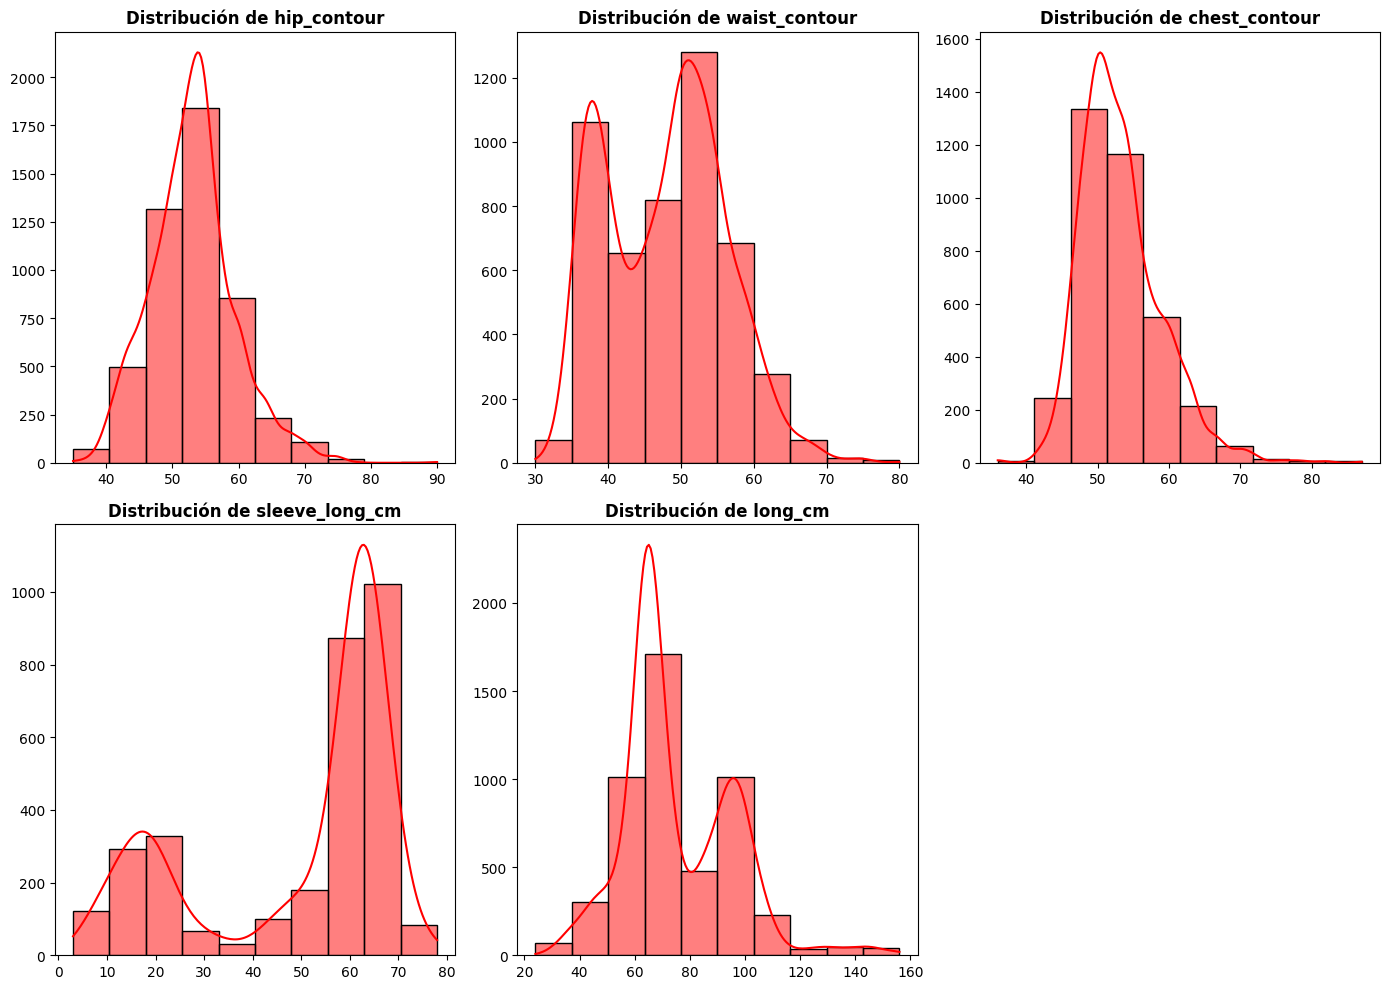

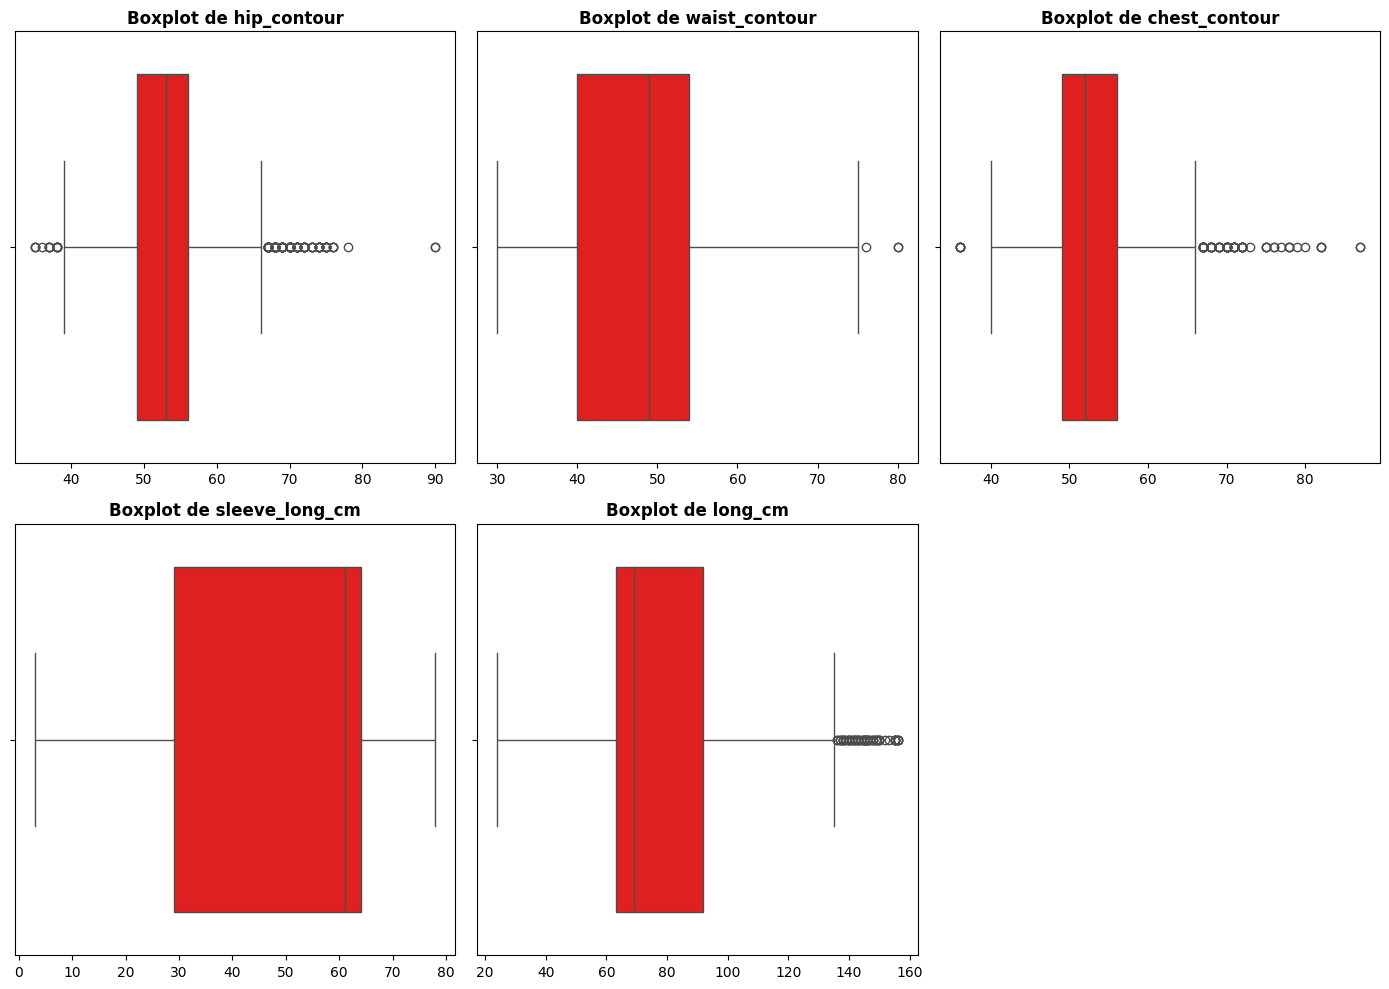

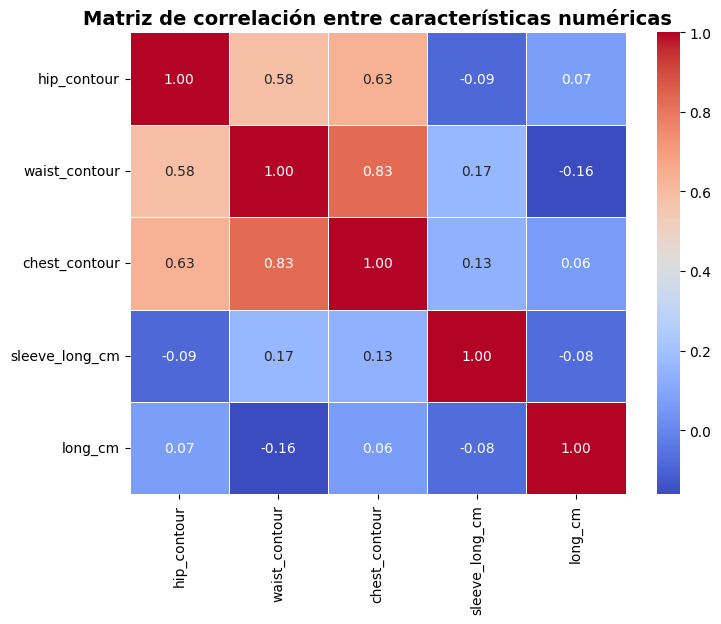

In [48]:
import os

df_features = pd.json_normalize(df_resultado2['caracteristicas'])

df_analysis = pd.concat([df_resultado2.copy(), df_features], axis=1)

# Análisis de características categóricas
output_folder = 'graficos'
os.makedirs(output_folder, exist_ok=True)

categorical_features = ['finishing', 'adventurous', 'closing', 'weather', 'neck', 
                        'detail', 'print', 'style', 'fit', 'sleeve', 'sleeve_long', 'sizing', 
                        'application', 'composition', 'fabric']

#  Análisis de características numéricas

numeric_features = ['hip_contour', 'waist_contour', 'chest_contour', 'sleeve_long_cm', 'long_cm']

df_analysis[numeric_features] = df_analysis[numeric_features].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(14, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)  # Crear subgráficos (2 filas, 3 columnas)
    sns.histplot(df_analysis[feature], kde=True, color='red', bins=10)
    plt.title(f'Distribución de {feature}', fontsize=12, weight='bold')
    plt.gca().set_ylabel('')  # Eliminar etiqueta del eje vertical
    plt.gca().set_xlabel('')  # Eliminar etiqueta del eje vertical

plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'histogramas_numericas.png'))
plt.show()


plt.figure(figsize=(14, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)  # Crear subgráficos (2 filas, 3 columnas)
    sns.boxplot(data=df_analysis, x=feature, color='red')
    plt.title(f'Boxplot de {feature}', fontsize=12, weight='bold')
    plt.gca().set_xlabel('')  # Eliminar etiqueta del eje vertical

plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'boxplots_numericas.png'))
plt.show()

correlation_matrix = df_analysis[numeric_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlación entre características numéricas', fontsize=14, weight='bold')
plt.savefig(os.path.join(output_folder, 'matriz_correlacion.png'))
plt.show()

In [28]:
feature= pd.read_csv('Datos\Datos looks//feature.csv')

# Filtrar las filas donde 'name' contiene '_type'
filtered_types = feature['name'][feature['name'].str.contains('_type', na=False)].unique()

# Mostrar los valores únicos filtrados
print("Valores únicos que contienen '_type':", filtered_types)

Valores únicos que contienen '_type': ['top_type' 'jump_suit_type' 'skirt_type' 'dress_type' 'sole_type'
 'shoe_type' 'bag_type' 'outside_type' 'foulard_type' 'down_part_type'
 'leg_height_type' 'heel_type']


In [29]:
key_counts = {}
for row in df_resultado2['caracteristicas']:
    if isinstance(row, dict):  # Validar que sea un diccionario
        for key in row.keys():
            if key.endswith('_type'):
                key_counts[key] = key_counts.get(key, 0) + 1

print("Conteo de ocurrencias por clave '_type':", key_counts)

Conteo de ocurrencias por clave '_type': {'top_type': 2503, 'down_part_type': 971, 'outside_type': 730, 'dress_type': 350, 'foulard_type': 157, 'skirt_type': 364, 'bag_type': 168}


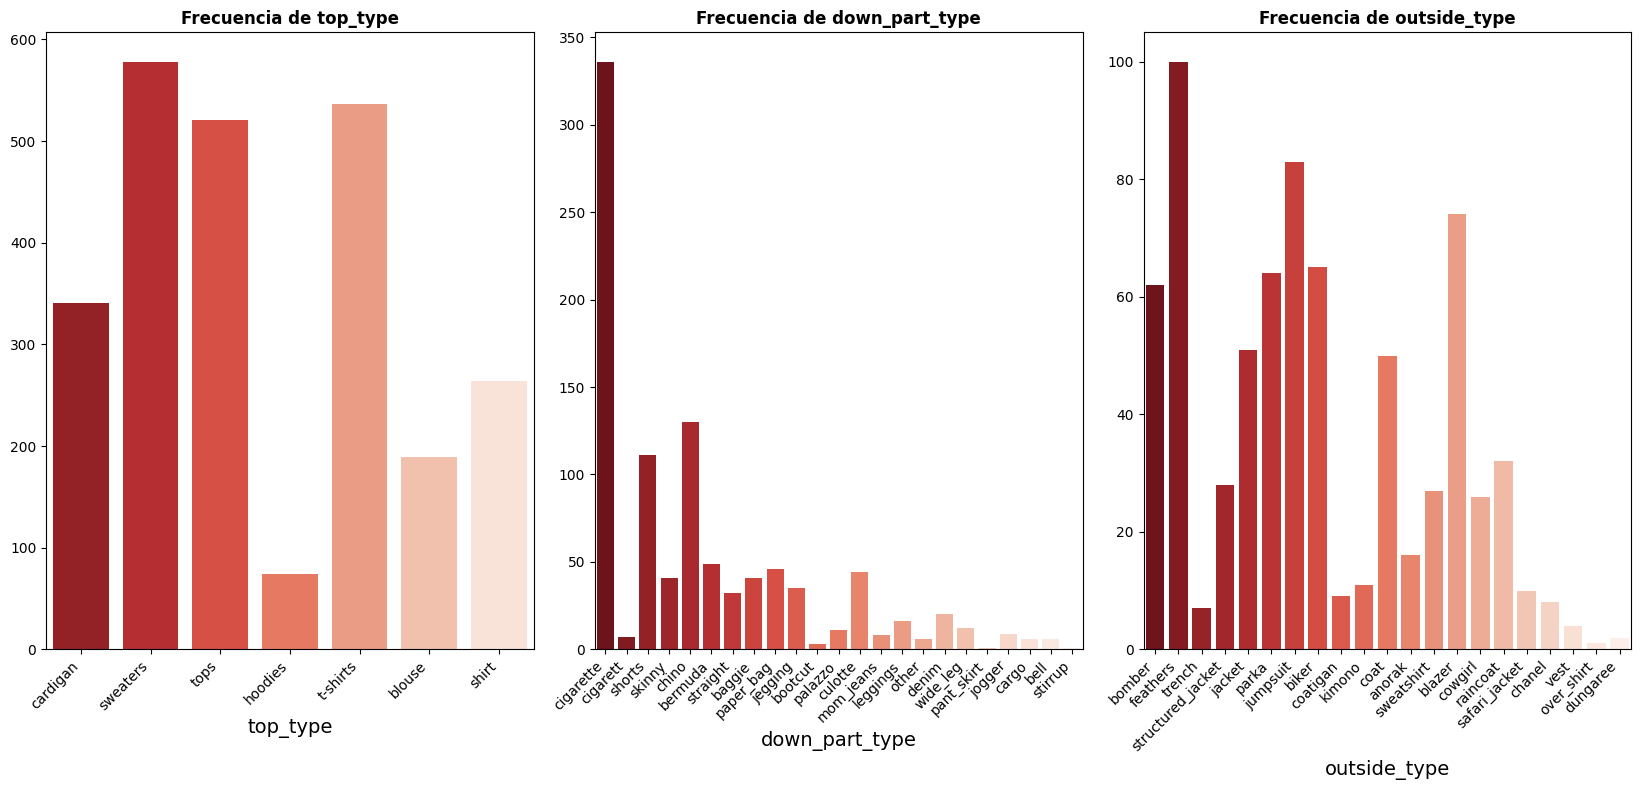

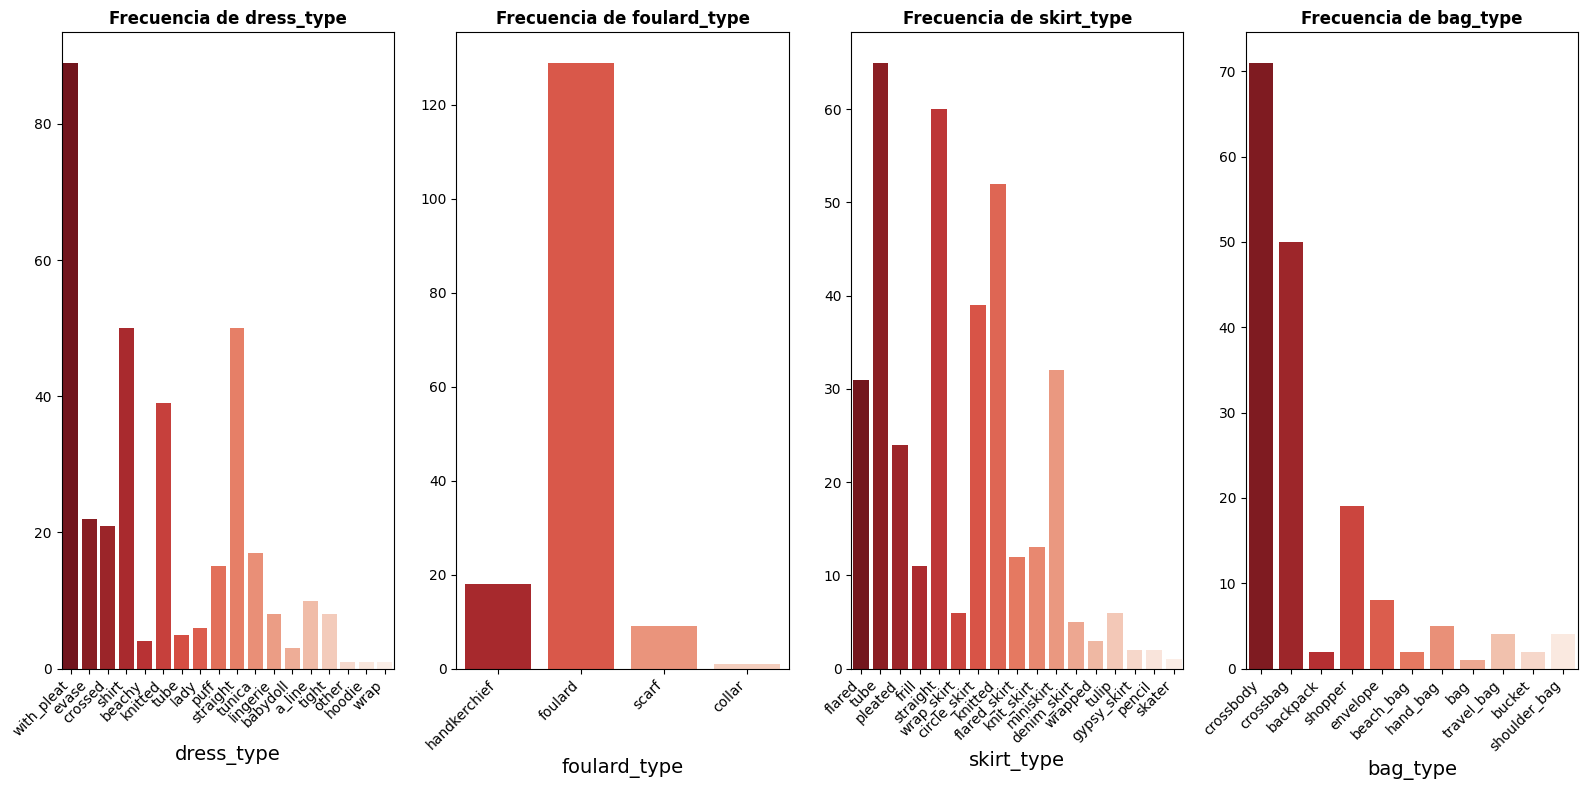

In [30]:
# Filtrar las columnas que terminan en "_type"
type_features = [col for col in df_analysis.columns if col.endswith('_type')]

# Dividir las características en dos grupos (dependiendo de la cantidad)
half = len(type_features) // 2

# Primer gráfico
plt.figure(figsize=(22, 8))
for i, feature in enumerate(type_features[:half], 1):  # Primer grupo de características
    plt.subplot((half + 3) // 4, 4, i)  # Ajustar filas y columnas dinámicamente
    sns.countplot(data=df_analysis, x=feature, palette='Reds_r')
    plt.title(f'Frecuencia de {feature}', fontsize=12, fontweight='bold')  # Título en negrita
    plt.ylabel('')  # Quitar el 'count' del eje vertical
    plt.xlabel(f'{feature}', fontsize=14)  # Título del eje horizontal más grande
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Segundo gráfico
plt.figure(figsize=(16, 8))
for i, feature in enumerate(type_features[half:], 1):  # Segundo grupo de características
    plt.subplot((len(type_features) - half + 3) // 4, 4, i)  # Ajustar filas y columnas dinámicamente
    sns.countplot(data=df_analysis, x=feature, palette='Reds_r')
    plt.title(f'Frecuencia de {feature}', fontsize=12, fontweight='bold')  # Título en negrita
    plt.ylabel('')  # Quitar el 'count' del eje vertical
    plt.xlabel(f'{feature}', fontsize=14)  # Título del eje horizontal más grande
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



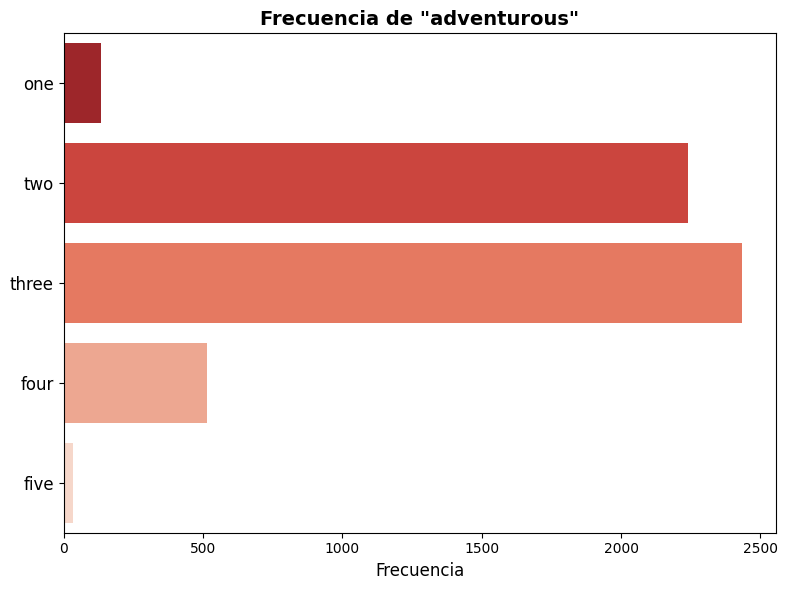

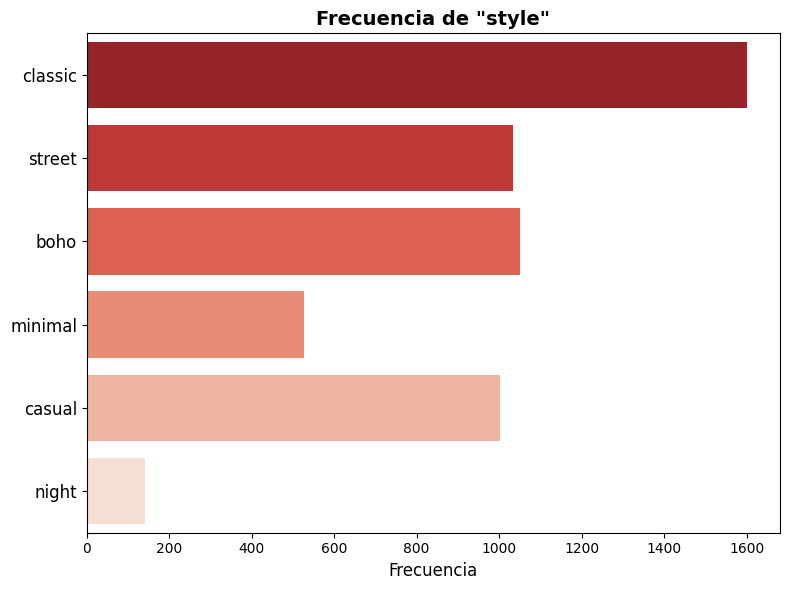

In [31]:
# Filtrar las claves para "adventurous" y "style"
keys_to_plot = ['adventurous', 'style']

for key in keys_to_plot:
    plt.figure(figsize=(8, 6))
    
    # Filtrar el DataFrame por la clave actual
    key_data = expanded_df[expanded_df['key'] == key]
    
    # Si es la clave 'adventurous', ordenar los valores
    if key == 'adventurous':
        order = ['one', 'two', 'three', 'four', 'five']
    else:
        order = None  # No aplicar ningún orden para otras claves
    
    # Crear el gráfico de barras para la clave
    sns.countplot(data=key_data, y='value', palette='Reds_r', order=order)
    
    # Eliminar título del eje y
    plt.ylabel('', fontsize=14)
    
    # Título con la clave en negrita y el formato "Frecuencia de ..."
    plt.title(f'Frecuencia de "{key}"', fontsize=14, fontweight='bold')
    plt.xlabel('Frecuencia', fontsize=12)
    
    # Aumentar tamaño de texto en el eje vertical (valores)
    plt.tick_params(axis='y', labelsize=12)
    
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()


In [32]:
def asignar_nivel(caracteristicas):
    """

    """
    if isinstance(caracteristicas, dict):  # Verificamos que 'caracteristicas' sea un diccionario
        for key in caracteristicas:
            if key.endswith('_type'):  # Verificamos si la clave termina con '_type'
                if key in ['down_part_type', 'skirt_type']:
                    return 1.1  # Nivel 1
                elif key == 'dress_type':
                    return 1.2  # Nivel 1.2 para 'dress_type'
                elif key == 'top_type':
                    if caracteristicas[key] in ['shirt', 't-shirts', 'tops']:
                        return 2.0  # Nivel 2 para valores específicos
                    else:
                        return 3.0  # Nivel 3 para otros valores de 'top_type'
                elif key == 'outside_type':
                    return 3.1  # Nivel 3.1 para 'outside_type'
                elif key in ['foulard_type', 'bag_type']:
                    return 3.2  # Nivel 3.2 para 'foulard_type' y 'bag_type'
    return None  # En caso de no encontrar un '_type' correspondiente


# Aplicar la función a la columna 'caracteristicas' y crear la nueva columna 'nivel'
df_resultado2['nivel'] = df_resultado2['caracteristicas'].apply(asignar_nivel)

# Verificar el resultado
print(df_resultado2[['caracteristicas', 'nivel']].head())


                                      caracteristicas  nivel
0   {'top_type': 'cardigan', 'finishing': 'ribbed'...    3.0
3   {'top_type': 'cardigan', 'finishing': 'ribbed'...    3.0
4   {'top_type': 'cardigan', 'finishing': 'ribbed'...    3.0
15  {'down_part_type': 'cigarette', 'adventurous':...    1.1
20  {'top_type': 'sweaters', 'adventurous': 'two',...    3.0


In [33]:
# Contar las ocurrencias por nivel
nivel_counts = df_resultado2['nivel'].value_counts(dropna=False)  # dropna=False para incluir posibles NA

# Mostrar el conteo por nivel
print("Conteo de ocurrencias por nivel:", nivel_counts)

# Comprobar si hay valores NA en la columna 'nivel'
na_count = df_resultado2['nivel'].isna().sum()

print(f"Cantidad de valores NA en la columna 'nivel': {na_count}")

# Si hay NA's, podemos manejarlo de diferentes maneras, por ejemplo:
# Reemplazarlos con un nivel predeterminado o eliminarlos
# Por ejemplo, podemos asignar un nivel 0 a los NA's:
df_resultado2['nivel'].fillna(0, inplace=True)

# Volver a contar después de manejar los NA's
nivel_counts_after = df_resultado2['nivel'].value_counts()

# Mostrar los resultados después de manejar los NA's
print("Conteo de ocurrencias por nivel (después de manejar los NA's):", nivel_counts_after)


Conteo de ocurrencias por nivel: nivel
1.1    1335
2.0    1321
3.0    1182
3.1     730
1.2     350
3.2     325
NaN     114
Name: count, dtype: int64
Cantidad de valores NA en la columna 'nivel': 114
Conteo de ocurrencias por nivel (después de manejar los NA's): nivel
1.1    1335
2.0    1321
3.0    1182
3.1     730
1.2     350
3.2     325
0.0     114
Name: count, dtype: int64


In [34]:
# Filtrar las filas donde 'nivel' es NaN
na_rows = df_resultado2[df_resultado2['nivel']==0.0]

# Extraer la segunda palabra de la columna 'title' en las filas con NaN en 'nivel'
na_rows['segunda_palabra_title'] = na_rows['title'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else None)

# Mostrar los valores únicos de la segunda palabra extraída
segunda_palabra_title_unique = na_rows['segunda_palabra_title'].unique()
print("Valores únicos de la segunda palabra en 'title' con NaN en 'nivel':", segunda_palabra_title_unique)


Valores únicos de la segunda palabra en 'title' con NaN en 'nivel': ['Scarf' 'Trench' 'Coat' 'Jacket' 'Dress' 'Top']


In [35]:
# Diccionario con las asignaciones de tipo a nivel
tipo_a_nivel = {
    'Scarf': 3.2,
    'Trench': 3.2,
    'Coat': 3.1,
    'Jacket': 3.1,
    'Dress': 1.2,
    'Top': 2.0
}

# Función para asignar el nivel basado en la segunda palabra de 'title'
def actualizar_nivel(row):
    # Verificar si 'segunda_palabra_title' está en el diccionario y actualizar 'nivel'
    if row['segunda_palabra_title'] in tipo_a_nivel:
        return tipo_a_nivel[row['segunda_palabra_title']]
    return row['nivel']  # Si no se encuentra, mantener el nivel actual

# Aplicar la función de actualización de nivel a las filas con 'nivel' igual a 0.0
na_rows['nivel'] = na_rows.apply(lambda row: actualizar_nivel(row) if row['nivel'] == 0.0 else row['nivel'], axis=1)

df_resultado2.update(na_rows)

# Verificar el resultado en el DataFrame original
print(df_resultado2['nivel'].value_counts())


nivel
1.1    1335
2.0    1322
3.0    1182
3.1     736
3.2     431
1.2     351
Name: count, dtype: int64


In [36]:
# Función para clasificar las prendas en formales o informales
def asignar_formalidad(caracteristicas):
    # Definir criterios de clasificación
    formal_keywords = {"blazer", "trousers", "formal", "suit", "tailored", "polished", "vest", "blouse", "tie", "pleated", "classic", "office", "elegant", "creased", "cigarette", "bow"}
    informal_keywords = {"t-shirt", "jeans", "hoodie", "sneakers", "denim", "casual", "relaxed", "shorts", "joggers", "tracksuit", "oversized", "sport", "laid-back", "street", "boho", "marbled", "feathers", "bermuda", "freetime"}

    # Buscar coincidencias en las características
    for key, value in caracteristicas.items():
        if isinstance(value, str):
            value_lower = value.lower()
            if any(keyword in value_lower for keyword in formal_keywords):
                return "Formal"
            if any(keyword in value_lower for keyword in informal_keywords):
                return "Informal"
    return "Unknown"  # Si no encaja en ninguna categoría


# Aplicar la clasificación a la columna 'caracteristicas'
df_resultado2['formalidad'] = df_resultado2['caracteristicas'].apply(asignar_formalidad)

# Mostrar un resumen de la clasificación
classification_summary = df_resultado2['formalidad'].value_counts()
classification_summary

formalidad
Informal    3153
Formal      1943
Unknown      261
Name: count, dtype: int64

In [37]:
def clasificacion_unknown(row):
    # Solo aplicar la clasificación si la formalidad es "Unknown"
    if row['formalidad'] != "Unknown":
        return row['formalidad']
    
    item = row['caracteristicas']
    formal_score = 0
    informal_score = 0

    # Combinaciones para sumar formalidad
    if 'detail' in item and ('lace' in item['detail'] or 'sequins' in item['detail']):
        formal_score += 2
    if 'application' in item and ('business_casual' in item['application'] or 'cocktail' in item['application']):
        formal_score += 2
    if 'fabric' in item and item['fabric'] in ['chiffon', 'velvet', 'leather']:
        formal_score += 2
        if 'detail' in item and 'distressed' not in item['detail']:
            formal_score += 1 
    if 'print' in item and item['print'] in ['geometric', 'striped', 'paisley']:
        formal_score += 2
    if 'closing' in item and item['closing'] in ['hidden_zipper', 'hook_and_eye'] and 'fabric' in item and item['fabric'] in ['satin', 'suede']: 
        formal_score += 2 
    if 'style' in item and item['style'] in ['evening', 'formal'] and 'detail' in item and ('pearls' in item['detail'] or 'embroidery' in item['detail']): 
        formal_score += 2 
    if 'sleeves' in item and item['sleeves'] == 'long_sleeves' and 'type_of_length' in item and item['type_of_length'] in ['knee_length', 'full_length']: 
        formal_score += 1 

    # Combinaciones para sumar informalidad
    if 'detail' in item and ('distressed' in item['detail'] or 'graphic' in item['detail']):
        informal_score += 2
    if 'application' in item and ('beach' in item['application'] or 'leisure' in item['application']):
        informal_score += 2
    if 'fabric' in item and item['fabric'] in ['jersey', 'flannel', 'fleece']:
        informal_score += 2
    if 'print' in item and item['print'] in ['floral', 'animal_print', 'tie_dye']:
        informal_score += 1
        if 'cut' in item and item['cut'] in ['wrap', 'bodycon']: 
            informal_score -= 1
    if 'closing' in item and item['closing'] in ['snap_fasteners'] and 'fabric' in item and item['fabric'] in ['canvas', 'knit']: 
        informal_score += 2 
    if 'style' in item and item['style'] in ['sporty', 'vacation'] and 'detail' in item and ('elastic' in item['detail'] or 'drawstring' in item['detail']): 
        informal_score += 2 
    if 'sleeves' in item and (item['sleeves'] == 'short_sleeves' or item['sleeves'] == 'sleeveless') and 'type_of_length' in item and item['type_of_length'] == 'mini_length': 
        informal_score += 1
    

    # Determinar la clasificación final basada en los puntajes
    return "Formal" if formal_score > informal_score else "Informal"

# Aplicar la segunda clasificación solo a las filas con "Unknown"
df_resultado2['formalidad'] = df_resultado2.apply(clasificacion_unknown, axis=1)

# Mostrar un resumen de la clasificación
classification_summary = df_resultado2['formalidad'].value_counts()
classification_summary

formalidad
Informal    3392
Formal      1965
Name: count, dtype: int64

In [38]:
df_resultado2.drop(columns=['name'], inplace=True)
df_resultado2.head()


,id_variant,id,title,season,hexadecimal,family_id,caracteristicas,id_hex,weather,nivel,formalidad
0,fbc2f719-e038-4243-892c-7bd2ca6e80b5,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,000000,141f32d6-a5af-49bf-b019-fd28354977f1,"{'top_type': 'cardigan', 'finishing': 'ribbed'...",5f5c4a50-557a-4d53-9e81-cc72fdd18fbf_000000,cold,3.0,Formal
3,c85666c0-a8ba-42f4-a30f-17687ad51ff5,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,DFC8B2,141f32d6-a5af-49bf-b019-fd28354977f1,"{'top_type': 'cardigan', 'finishing': 'ribbed'...",5f5c4a50-557a-4d53-9e81-cc72fdd18fbf_DFC8B2,cold,3.0,Formal
4,93db9797-3a66-4889-be9c-5d3522da96a1,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,B94600,141f32d6-a5af-49bf-b019-fd28354977f1,"{'top_type': 'cardigan', 'finishing': 'ribbed'...",5f5c4a50-557a-4d53-9e81-cc72fdd18fbf_B94600,cold,3.0,Formal
15,0c1010aa-2f25-4c55-9f95-b9bc133f3307,6e6b4255-006a-4d13-b312-3b1426290d8e,Poly Pant deeluxe,7,B11730,6598b655-3e19-448c-8b4f-ff6a29447b34,"{'down_part_type': 'cigarette', 'adventurous':...",6e6b4255-006a-4d13-b312-3b1426290d8e_B11730,warm,1.1,Formal
20,215a323c-9721-4879-9aa6-5cf30b5b21f0,6549c1b1-989e-432a-bdc9-b603c438b310,Onleden Sweater knt,9,FFFF00,1b93b30c-833f-45a8-ba69-c21d2e7f4824,"{'top_type': 'sweaters', 'adventurous': 'two',...",6549c1b1-989e-432a-bdc9-b603c438b310_FFFF00,warm,3.0,Informal


In [39]:
# Expandir la columna 'caracteristicas' en nuevas columnas
caracteristicas_df = df_resultado2['caracteristicas'].apply(pd.Series)

# Obtener el conjunto total de claves de 'caracteristicas'
caracteristicas_keys = set()
df_resultado2['caracteristicas'].apply(lambda x: caracteristicas_keys.update(x.keys()))

# Añadir columnas que podrían no existir en todos los productos
for key in caracteristicas_keys:
    if key not in caracteristicas_df.columns:
        caracteristicas_df[key] = 0

# Reemplazar la columna 'caracteristicas' por las columnas expandidas
df = df_resultado2.drop(columns=['caracteristicas'])
df = pd.concat([df, caracteristicas_df], axis=1)

df.head()


,id_variant,id,title,season,hexadecimal,family_id,id_hex,weather,nivel,formalidad,...,foulard_type,size,skirt_type,message,hood,back_neckline,shoulders_pad,bag_type,hips_volume,chest_volume
0,fbc2f719-e038-4243-892c-7bd2ca6e80b5,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,000000,141f32d6-a5af-49bf-b019-fd28354977f1,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf_000000,cold,3.0,Formal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,c85666c0-a8ba-42f4-a30f-17687ad51ff5,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,DFC8B2,141f32d6-a5af-49bf-b019-fd28354977f1,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf_DFC8B2,cold,3.0,Formal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,93db9797-3a66-4889-be9c-5d3522da96a1,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,B94600,141f32d6-a5af-49bf-b019-fd28354977f1,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf_B94600,cold,3.0,Formal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,0c1010aa-2f25-4c55-9f95-b9bc133f3307,6e6b4255-006a-4d13-b312-3b1426290d8e,Poly Pant deeluxe,7,B11730,6598b655-3e19-448c-8b4f-ff6a29447b34,6e6b4255-006a-4d13-b312-3b1426290d8e_B11730,warm,1.1,Formal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,215a323c-9721-4879-9aa6-5cf30b5b21f0,6549c1b1-989e-432a-bdc9-b603c438b310,Onleden Sweater knt,9,FFFF00,1b93b30c-833f-45a8-ba69-c21d2e7f4824,6549c1b1-989e-432a-bdc9-b603c438b310_FFFF00,warm,3.0,Informal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


MAPEO PARA GRAFO

In [40]:
mapeo_adventurous = {
    'two': 1, 'three': 2, 'four': 3, 'one': 4, 'five': 5
}

df['adventurous'] = df['adventurous'].map(mapeo_adventurous)

In [41]:
df.head()

,id_variant,id,title,season,hexadecimal,family_id,id_hex,weather,nivel,formalidad,...,foulard_type,size,skirt_type,message,hood,back_neckline,shoulders_pad,bag_type,hips_volume,chest_volume
0,fbc2f719-e038-4243-892c-7bd2ca6e80b5,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,000000,141f32d6-a5af-49bf-b019-fd28354977f1,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf_000000,cold,3.0,Formal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,c85666c0-a8ba-42f4-a30f-17687ad51ff5,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,DFC8B2,141f32d6-a5af-49bf-b019-fd28354977f1,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf_DFC8B2,cold,3.0,Formal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,93db9797-3a66-4889-be9c-5d3522da96a1,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,B94600,141f32d6-a5af-49bf-b019-fd28354977f1,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf_B94600,cold,3.0,Formal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,0c1010aa-2f25-4c55-9f95-b9bc133f3307,6e6b4255-006a-4d13-b312-3b1426290d8e,Poly Pant deeluxe,7,B11730,6598b655-3e19-448c-8b4f-ff6a29447b34,6e6b4255-006a-4d13-b312-3b1426290d8e_B11730,warm,1.1,Formal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,215a323c-9721-4879-9aa6-5cf30b5b21f0,6549c1b1-989e-432a-bdc9-b603c438b310,Onleden Sweater knt,9,FFFF00,1b93b30c-833f-45a8-ba69-c21d2e7f4824,6549c1b1-989e-432a-bdc9-b603c438b310_FFFF00,warm,3.0,Informal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
#df_resultado.to_csv('Datos/transformados/df_resultado.csv')
df.to_csv('Datos/transformados/df_resultado.csv')

- Combinación de colores cargar dos ficheros y juntar

In [43]:
df1 = pd.read_csv('color_combinations_responses_user_1_2.csv')
df2 = pd.read_csv('color_combinations_responses_user_3_4.csv')

df_colores = pd.concat([df1, df2], ignore_index=True)
df_colores.drop(columns=['user'], inplace=True)

df_colores['combination'] = df_colores['combination'].map({'yes': 1, 'no': 0})

df_colores.to_csv('combinaciones_colores.csv', index=False)

print(df_colores.head())

   color1  color2  combination
0  000000  DFC8B2            1
1  000000  B94600            1
2  000000  B11730            1
3  000000  FFFF00            0
4  000000  ECE9D6            1
